
# Week 6 - Discovering Patterns: Clusters & Topics

This week, we seek to seek to discover patterns in our text data. First, we take a text corpus that we have developed and discovery emergent clusters through a process known as clustering or partitioning. We pilot this here both with a well-known *flat* clustering method, `kmeans`, and also a *hierarchical* approach, `Ward's (minimum variance) method`. We will demonstrate a simple (graphical) approach to identifying optimal cluster number, the sillhouette method, and evaluate the quality of unsupervised clusters on labeled data. Next, we will explore a method of two dimensional content clustering called topic modeling (e.g., words cluster in topics; topics cluster in documents). This statistical technique models and computationally induces *topics* from data, which are sparse distributions over (nonexclusive clusters of) words, from which documents can formally be described as sparse mixtures. We will explore these topics and consider their utility for understanding trends within a corpus. We will consider how to construct models that take document cluster and topic loadings as predictive features, the basis of influence metrics and dynamically over time.

For this notebook we will be using the following packages:

In [5]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

Cell 1:

## <span style="color:red">*Pitch Your Project*</span>

<span style="color:red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

Cell 2:

# ***What?*** 
<200 words

Cell 3:

## ***Why?***
<200 words

Cell 4:

## ***How?***
<400 words

Cell 5:

## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication) beyond this class? (<300 words).

Cell 6:

## ***Which (words)?***
<300 words

What:

I am planning to analyze a corpus composed of text scraped from the descriptions and associated metadata of HITs (Human Intelligence Tasks) listed on the Amazon Mechanical Turk (mTurk) digital crowdlabor platform website.  

The context of these data is the virtual markeplace of mTurk, where private organizations and individuals contract the crowdsourced microlabor of mTurk Workers for the completion of the HIT tasks, for which the Workers are either compensated or not at the discretion of the contractor (Requester).  

The social game of this context is the implicit market negotiation between the Requesters and Workers, where the former party attempts to price their HIT so as to minimize their payment to the Workers (and Amazon, which takes a cut) while maximizing the profitability of whatever product/service/etc the HIT responses are being used to produce.  There are other factors involved as well, such as selecting for specific qualifications among the Workers permitted to perform the published HITs given their nature, and the amount of time allotted to Workers for completing the HITs, all of which is at the discretion of the Requesters.

I intend to learn what patterns, if any, there are between the available description texts and metadata of the currently published HITs.  From this, I hope to make inferences about the economic and social-symbolic trends therein.

Why:

The reason why I have chosen to analyze this data pertaining to mTurk is that digital crowdlabor platforms exist as a somewhat unique and important component of many different industries and institutions, such as machine learning design and academic social science research.  Amazon Mechanical Turk is currently the premier platform for ditigal crowdlabor, so by better understanding the patterns and dynamics which appear in the HITs published on mTurk, I hope to progress an understanding of digital crowdlabor in general.  

Thus, this reserach has inherent relevance to understanding not just the economic processes behind the aforementioned industries and institutions, but also is relevant to 21st century labor studies since it seems likely that digital crowdlabor will continue to expand as as a mode of productions alongside those industries which it supports.

For the average person, computationally analyzed information on the patterns of pricing and instructions of mTurk HITs could be highly useful, as many mTurk Workers themselves employ 3rd party software for automatically filtering and sorting potential HITs based on such information already.  By contributing to the existing knowledgebase of that information, this research could help improve the ability of mTurk Workers to more optimally negotiate in the digital crowdlabor market.

How:

The means by which I plan to investigate the mTurk marketplace is by webscraping the HITs main page list for all available description and metadata text, cleaning and formatting that data into an indexed corpus, and then subjecting that corpus to a series of topic models and vector analyses.

For the websrcaping and text cleaning component, I will lilely use BeautifulSoup, although it is possible I might need to rely on a different module due to Amazon's anti-webscraping measures.  I intend to scrape data from as many pages of HITs as possible using a spidering method if I do ultimately use BeautifulSoup.

To format the scraped and cleaned data, I will use Pandas to convert it into a corpus that can be expressed as a dataframe(s) for content analysis.

For the content analysis component, I will likely use a combination of techniques and modules.  These will likely include topic modeling, word embeddings, clustering, frequency analysis, and/or others.  From these visualizations and metrics, the inferences of the project will be derived.

Which:

The rationale behind the sample design, as proposed, is that the HITs listings constitute the primary object with which the social games of economic market negotiations and labor relations in the mTurk environment are played.  The HIT listings are the nexus of Worker-Requester interaction as economic agents.  The data expressed in any given HIT constitutes the full basis by which Workers decide to perform it or not, as well as including in its description a significant amount of information about what the labor itself entails.  It is even possible that, by examining correlations between HIT descriptions and metadata, inferences could be made about the type of product/servce/etc they are being used to produce.  All of these factors make the HIT listings the ideal vector for investigating the research questions as described above.

The limitations of this sample are many, but should not pose significant problems for the validity of the research if properly managed.  
For instance, the website architecture of the mTurk HITs page is such that straightforward html webscraping methods may not be able to bypass the anti-webscraping measures in place.  If so, this will require alternative methods.
The data contained within the individual HIT listings is also itself limited.  Aside for the title, short description, and excerpted instructions, there is very little in terms of descriptive text data contained within a HIT as it is listed on the page.  The remaining metadata includes price, time allotted, the name of the Requester, and a few other details, but is similarly limited.  Without accepting and performing the HIT, the full picture of what it entails in terms of actual labor is impossible to judge.

It is not clear how this project could be scaled up, except by virtue of using a more powerful webscraping technique to create a larger corpus.  However, one alternative could be to crowdsource the work of extracting this data through mTurk itself, although the economic feasibility and ethical implications of this method are questionable especially for the scope of this project.

# Getting our corpora

To begin, we will use a well known corpus of testing documents from the *20 Newsgroups corpus*, a dataset commonly used to illustrate text applications of text clustering and classification. This comes packaged with sklearn and comprises approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 newsgroups. It was originally collected by Ken Lang, probably for his 1995 *Newsweeder: Learning to filter netnews* paper. The data is organized into 20 distinct newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related (e.g. comp.sys.ibm.pc.hardware / comp.sys.mac.hardware), while others are unrelated (e.g misc.forsale / soc.religion.christian). 

In [7]:
newsgroups = sklearn.datasets.fetch_20newsgroups(subset='train', data_home = '../data/scikit_learn_data')
print(dir(newsgroups))

['DESCR', 'data', 'filenames', 'target', 'target_names']


We can ascertain the categories with `target_names` or the actual files with `filenames`

In [70]:
print(newsgroups.target_names)
print(len(newsgroups.data))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
11314


We will start by converting the provided data into pandas DataFrames.

First we reduce our dataset for this analysis by dropping some extraneous information and converting it into a DataFrame.

In [71]:
newsgroupsCategories = ['comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos']

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])

for category in newsgroupsCategories:
    print("Fetching data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(subset='train', categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data/scikit_learn_data/')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

#Creating an explicit index column for later

#newsgroupsDF['index'] = range(len(newsgroupsDF))
#newsgroupsDF.set_index('index', inplace = True)
print(len(newsgroupsDF))
newsgroupsDF[:10]

Fetching data for: comp.sys.mac.hardware
Fetching data for: comp.windows.x
Fetching data for: misc.forsale
Fetching data for: rec.autos
2350


,category,source_file,text
0,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,"\tIn certain Apple 13"" RGB monitors there has ..."
1,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,Does anyone know how to reach Micron? I am in...
2,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,Hi there!\n\nCould some kind soul tell me what...
3,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,"""auto\nfrom"
4,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,\n\n Don't believe the hype. There is no su...
5,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,What is the value of an SE (HDFD) 4/20?\n\n-David
6,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,\n\nF A Q !\n\nReference:\nNewsgroups: comp.sy...
7,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,"\n\n\n Nope. The Apple 16"" monitor does not..."
8,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,\n\nIs it a hidden option? I'm using PowerStr...
9,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,\n\n\nThe previous article referred to the fac...


Next, we can convert the documents into word count vectors (e.g., *soc.religion.christian message a* might contain 3 mentions of "church", 2 of "jesus", 1 of "religion", etc., yielding a CountVector=[3,2,1,...])

In [72]:
#First it needs to be initialized
ngCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
#Then trained
newsgroupsVects = ngCountVectorizer.fit_transform(newsgroupsDF['text'])
print(newsgroupsVects.shape)

(2350, 23525)


This gives us a matrix with row a document and each column a word. The matrix is mostly zeros, so we store it as a sparse matrix, a data structure that contains and indexes only the nonzero entries.

In [73]:
newsgroupsVects

<2350x23525 sparse matrix of type '<class 'numpy.int64'>'
	with 177750 stored elements in Compressed Sparse Row format>

We can use the normal operations on this sparse matrix or convert it to normal matrix (not recommended for large sparse matrices :-)

In [74]:
newsgroupsVects[:10,:20].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

We can also lookup the indices of different words using the Vectorizer

In [75]:
ngCountVectorizer.vocabulary_.get('vector')

21647

There are some more interesting things to do...

Lets start with [term frequency–inverse document frequency](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)(tf-idf), a method for weighting document-distinguishing words.

In [76]:
#initialize
newsgroupsTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(newsgroupsVects)
#train
newsgroupsTF = newsgroupsTFTransformer.transform(newsgroupsVects)
print(newsgroupsTF.shape)

(2350, 23525)


This gives us the tf-idf for each word in each text

In [77]:
list(zip(ngCountVectorizer.vocabulary_.keys(), newsgroupsTF.data))[:20]

[('mikew', 0.08265545268171724),
 ('caltech', 0.05464092321093494),
 ('154620', 0.19706119834212132),
 ('wise', 0.05749878121929968),
 ('gsi', 0.07820822067701588),
 ('liquid', 0.0749569030656185),
 ('stylus', 0.10567912764152107),
 ('nj', 0.1109950967372947),
 ('zack', 0.05330795380898169),
 ('miscalculated', 0.21470375597395805),
 ('hire', 0.09901319943986409),
 ('ave', 0.19389877721110985),
 ('sunwrite', 0.1817286448065436),
 ('594', 0.19389877721110985),
 ('passed', 0.33279218254193177),
 ('future', 0.18819404816424326),
 ('antipolis', 0.08243502153417578),
 ('ancestor', 0.1619412292430009),
 ('glossies', 0.13074268623716792),
 ('et', 0.16299450361806797)]

At first glance, there appears to be a lot of garbage littering this unordered list with unique words and stopwords. Note, however, that words like *apple*, *rgb*, and *voltage* distinguish this newsgroup document, while stopwords post a much lower weight. Note that we could filter out stop words, stem and lem our data before vectorizering, or we can instead use tf-idf to filter our data (or **both**). For exact explanation of all options look [here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). To prune this matrix of features, we now limit our word vector to 1000 words with at least 3 occurrences, which do not occur in more than half of the documents. There is an extensive science and art to feature engineering for machine learning applications like clustering.

In [78]:
#initialize
ngTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
newsgroupsTFVects = ngTFVectorizer.fit_transform(newsgroupsDF['text'])

Lets look at the matrix

In [79]:
newsgroupsDF['text']

0       \tIn certain Apple 13" RGB monitors there has ...
1       Does anyone know how to reach Micron?  I am in...
2       Hi there!\n\nCould some kind soul tell me what...
3                                             "auto\nfrom
4       \n\n    Don't believe the hype. There is no su...
5       What is the value of an SE (HDFD) 4/20?\n\n-David
6       \n\nF A Q !\n\nReference:\nNewsgroups: comp.sy...
7       \n\n\n    Nope. The Apple 16" monitor does not...
8       \n\nIs it a hidden option?  I'm using PowerStr...
9       \n\n\nThe previous article referred to the fac...
10      \n\n\n    Yes. That is exactly what it means. ...
11      I saw once an article about a new line of Macs...
12      So, will it be possible to have a NuBus or PDS...
13      \n\n\nWho knows... I just quoted what was "wri...
14      \n\nI also returned PB memory last summer for ...
15      \n\nI think all Powerbooks use the same 2 Meg ...
16      A question in general about displaying NTSC th...
17      The li

The matrix is much smaller now, only 1000 words, but the same number of documents

We can still look at the words:

In [80]:
try:
    print(ngTFVectorizer.vocabulary_['vector'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(ngTFVectorizer.vocabulary_.keys())[:10]))

vector is missing
The available words are: ['future', 'multiple', 'posted', '16', 'compiled', 'buy', 'prog', 'configuration', 'reports', '1993'] ...


This is a reasonable matrix of features with which to begin identifying clusters.

# Flat Clustering with $K$-means

Lets start with $k$-means, an approach that begins with random clusters of predefined number, then iterates cluster reassignment and evaluates the new clusters relative to an objective function, recursively.

To do this we will need to know how many clusters we are looking for. Here the *true number* of clusters is 4. Of course, in most cases you would not know the number in advance.

In [81]:
numClusters = len(set(newsgroupsDF['category']))
numClusters

4

Then we can initialize our cluster finder

In [82]:
#k-means++ is a better way of finding the starting points
#We could also try providing our own
km = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')

And now we can calculate the clusters

In [83]:
km.fit(newsgroupsTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Once we have the clusters, we can evaluate them with a variety of metrics that sklearn provides. We will look at a few, including *Homogeneity*, *Completeness*, *V-measure* and *Adjusted Rand Score*. 

*Homogeneity* is a measure that grows (from 0 to 1) to the degree that all of its clusters contain only data points which are members of a single class (e.g., newsgroup). 

*Completeness* is *Homogeneity's* converse: a measure that grows (0 to 1) to the degree that all data points of a given class are also elements of the same cluster.

The *V-measure* is the harmonic mean of *Homogeniety* and *Completeness* ($v = 2 * (homogeneity * completeness) / (homogeneity + completeness$).

the *Adjusted Rand Score* is built atop the *Rand Index (RI)*, which computes the similarity between two clusterings by considering all pairs of samples and counting pairs assigned in the same or different clusters in the predicted and true clusterings (e.g., actual newsgroups). The *RI* is then adjusted for chance as follows:
$ARI = (RI - RI_{expected}) / (max(RI) - RI_{expected})$.
The Adjusted Rand Index is thus ensured to have a value close to 0.0 for random labeling independent of the number of clusters and samples, 1.0 when the clusterings are identical, and -1.0 when they are as bad (i.e., cross-cutting) as they can be.

In [84]:
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(newsgroupsDF['category'], km.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(newsgroupsDF['category'], km.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(newsgroupsDF['category'], km.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(newsgroupsDF['category'], km.labels_)))

The available metrics are: ['ConfusionMatrixDisplay', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'calinski_harabaz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'dcg_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_gamma_deviance', 'mean_poisson_deviance', 'mean_squared_error', 'mean_squared_log_error', '

You can evaluate these for different clustering solutions ($1-N$ clusters). You can also interrogate the alignment between specific documents and their cluster assignments by adding the cluster labels to the pandas dataframe.

In [85]:
newsgroupsDF['kmeans_predictions'] = km.labels_
newsgroupsDF

,category,source_file,text,kmeans_predictions
0,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,"\tIn certain Apple 13"" RGB monitors there has ...",0
1,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,Does anyone know how to reach Micron? I am in...,0
2,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,Hi there!\n\nCould some kind soul tell me what...,0
3,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,"""auto\nfrom",0
4,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,\n\n Don't believe the hype. There is no su...,0
5,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,What is the value of an SE (HDFD) 4/20?\n\n-David,0
6,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,\n\nF A Q !\n\nReference:\nNewsgroups: comp.sy...,0
7,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,"\n\n\n Nope. The Apple 16"" monitor does not...",0
8,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,\n\nIs it a hidden option? I'm using PowerStr...,0
9,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,\n\n\nThe previous article referred to the fac...,0


We can also look at the distinguishing features in each cluster:

In [86]:
terms = ngTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 know
 thanks
 mac
 just
 does
 drive
 apple
 like
 don
 problem


Cluster 1:
 window
 server
 use
 motif
 using
 widget
 program
 application
 like
 code


Cluster 2:
 car
 cars
 engine
 like
 just
 good
 think
 don
 new
 dealer


Cluster 3:
 sale
 00
 offer
 shipping
 condition
 new
 asking
 interested
 price
 email




Let's construct a visualization of the clusters. First, we will first reduce the
dimensionality of the data using principal components analysis (PCA).

In [87]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(newsgroupsTFVects.toarray())
reduced_data = pca.transform(newsgroupsTFVects.toarray())

The cell below is optional. It allows you to do a biplot

In [88]:
components = pca.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

Then, let's build a color map for the true labels.

In [89]:
colordict = {
'comp.sys.mac.hardware': 'red',
'comp.windows.x': 'orange',
'misc.forsale': 'green',
'rec.autos': 'blue',
    }
colors = [colordict[c] for c in newsgroupsDF['category']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([('rec.autos', 'blue'), ('misc.forsale', 'green'), ('comp.windows.x', 'orange'), ('comp.sys.mac.hardware', 'red')])


Let's plot the data using the true labels as the colors of our data points.

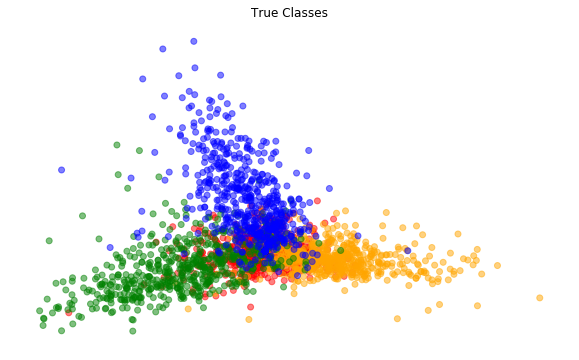

In [90]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

One nice thing about PCA is that we can also do a biplot and map our feature
vectors to the same space.

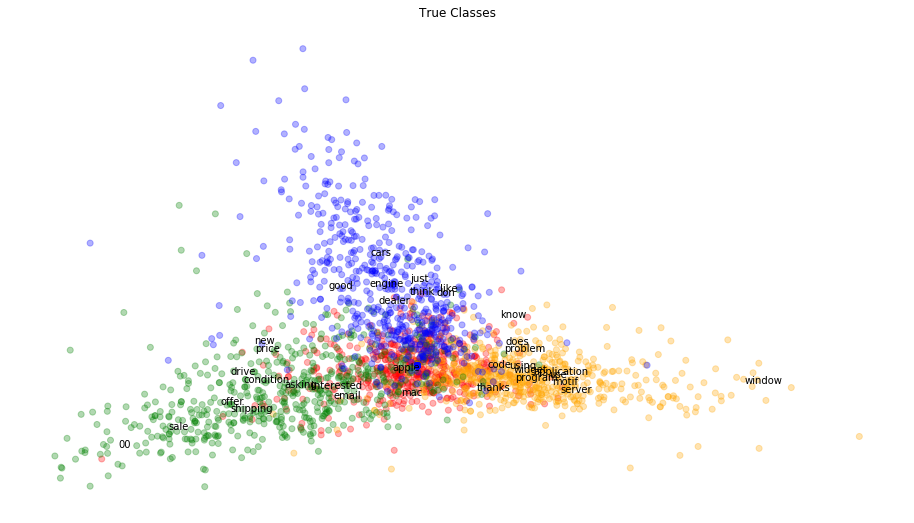

In [91]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.3, label = colors)
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

Let's do it again with predicted clusters.

In [92]:
colors_p = [colordict[newsgroupsCategories[l]] for l in km.labels_]

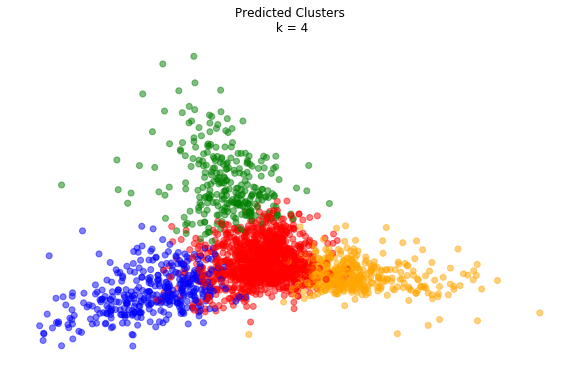

In [93]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = 4')
plt.show()

Let's try with 3 clusters.

In [94]:
km3 = sklearn.cluster.KMeans(n_clusters= 3, init='k-means++')
km3.fit(newsgroupsTFVects.toarray())

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Selecting Cluster Number

We can select an optimal cluster number by identifying the lowest of the metrics listed above (e.g., V-measure), but often you don't have "ground truth" or labeled data. For identifying the "best" number of clusters in an unsupervised way, we demonstrate the Silhouette method. Many other methods also exist (e.g., Bayesian Information Criteria or BIC, the visual "elbow criteria", etc.)

First we will define a helper function:

In [95]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

Now we can examine a few different numbers of clusters:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


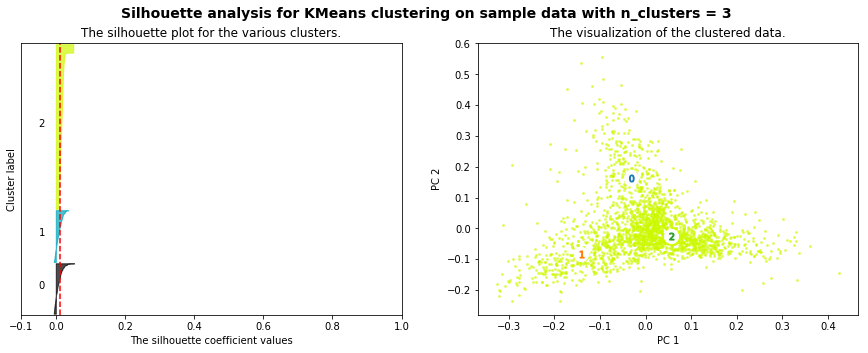

For n_clusters = 3, The average silhouette_score is : 0.013


In [96]:
X = newsgroupsTFVects.toarray()
plotSilhouette(3, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


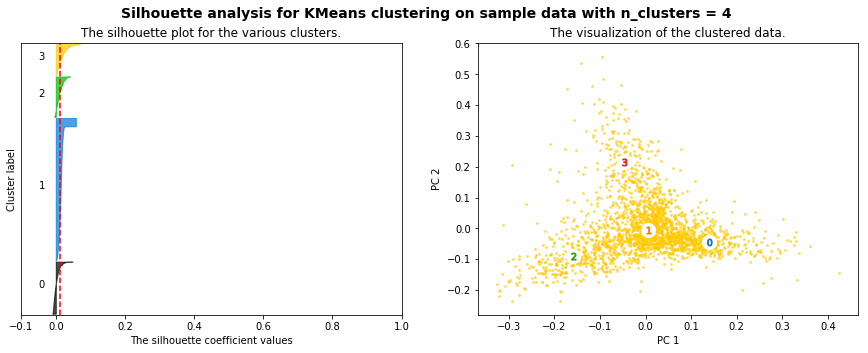

For n_clusters = 4, The average silhouette_score is : 0.012


In [97]:
X = newsgroupsTFVects.toarray()
plotSilhouette(4, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


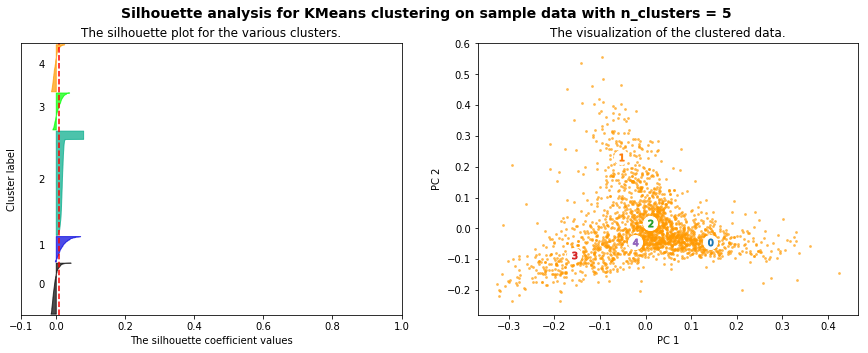

For n_clusters = 5, The average silhouette_score is : 0.010


In [98]:
X = newsgroupsTFVects.toarray()
plotSilhouette(5, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


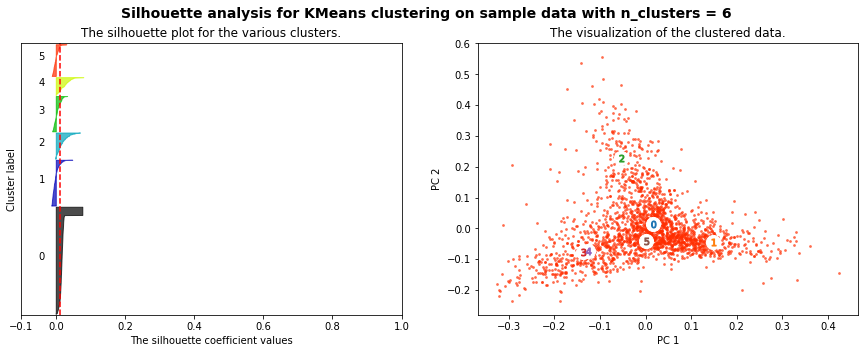

For n_clusters = 6, The average silhouette_score is : 0.011


In [99]:
X = newsgroupsTFVects.toarray()
plotSilhouette(6, X)

Interestingly, the silhouette scores above suggests that 3 is a better number of clusters than 4, which would be accurate if we (reasonsably) grouped the two computer-themed groups.

# Getting new text data

Lets start by using the same function as last lesson and loading a few press releases from 10 different senators into a DataFrame. The code to do this is below, but commented out as we've already downloaded the data to the data directory.

In [100]:
targetSenator = 'Kennedy'# = ['Voinovich', 'Obama', 'Whitehouse', 'Snowe', 'Rockefeller', 'Murkowski', 'McCain', 'Kyl', 'Baucus', 'Frist']
"""
#Uncomment this to download your own data
senReleasesTraining = pandas.DataFrame()

print("Fetching {}'s data".format(targetSenator))
targetDF = lucem_illud.getGithubFiles('https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/{}'.format(targetSenator), maxFiles = 2000)
targetDF['targetSenator'] = targetSenator
senReleasesTraining = senReleasesTraining.append(targetDF, ignore_index = True)

#Watch out for weird lines when converting to csv
#one of them had to be removed from the Kennedy data so it could be re-read
senReleasesTraining.to_csv("data/senReleasesTraining.csv")
"""

senReleasesTraining = pandas.read_csv("../data/senReleasesTraining.csv")

senReleasesTraining[:5]

,Unnamed: 0,download_url,html_url,name,path,text,targetSenator
0,0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Apr2005Kennedy14.txt,raw/Kennedy/01Apr2005Kennedy14.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE...,Kennedy
1,1,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2005Kennedy12.txt,raw/Kennedy/01Aug2005Kennedy12.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE...,Kennedy
2,2,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2006Kennedy10.txt,raw/Kennedy/01Aug2006Kennedy10.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...,Kennedy
3,3,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2006Kennedy11.txt,raw/Kennedy/01Aug2006Kennedy11.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...,Kennedy
4,4,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2006Kennedy12.txt,raw/Kennedy/01Aug2006Kennedy12.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...,Kennedy


Now we have the files we can tokenize and normalize.

The normalized text is good, but we know that the texts will have a large amount of overlap so we can use tf-idf to remove some of the most frequent words. Before doing that, there is one empty cell, let's remove that.

In [101]:
senReleasesTraining = senReleasesTraining.dropna(axis=0, how='any')

In [102]:
#Similar parameters to before, but stricter max df and no max num occurrences
senTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
senTFVects = senTFVectorizer.fit_transform(senReleasesTraining['text'])
senTFVectorizer.vocabulary_.get('senat', 'Missing "Senate"')

'Missing "Senate"'

# Clustering with our new data

One nice thing about using DataFrames for everything is that we can quickly convert code from one input to another. Below we are redoing the cluster detection with our senate data. If you setup your DataFrame the same way it should be able to run on this code, without much work.

First we will define what we will be working with

In [103]:
targetDF = senReleasesTraining
textColumn = 'text'
numCategories = 3

Tf-IDf vectorizing

In [104]:
exampleTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
exampleTFVects = ngTFVectorizer.fit_transform(targetDF[textColumn])

Running k means

In [105]:
exampleKM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
exampleKM.fit(exampleTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

And visualize:

In [106]:
examplePCA = sklearn.decomposition.PCA(n_components = 2).fit(exampleTFVects.toarray())
reducedPCA_data = examplePCA.transform(exampleTFVects.toarray())

colors = list(plt.cm.rainbow(np.linspace(0,1, numCategories)))
colors_p = [colors[l] for l in exampleKM.labels_]

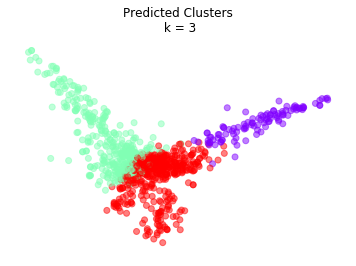

In [107]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reducedPCA_data[:, 0], reducedPCA_data[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = {}'.format(numCategories))
plt.show()

In this case, there may be two clusters that could be identified with Silhouette analysis or some of the metrics described above; although not having true classes makes that tricky. Below, we add these cluster assignments to the dataframe for individual perusal and evaluation.

In [108]:
targetDF['kmeans_predictions'] = exampleKM.labels_
targetDF

,Unnamed: 0,download_url,html_url,name,path,text,targetSenator,kmeans_predictions
0,0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Apr2005Kennedy14.txt,raw/Kennedy/01Apr2005Kennedy14.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE...,Kennedy,1
1,1,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2005Kennedy12.txt,raw/Kennedy/01Aug2005Kennedy12.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE...,Kennedy,2
2,2,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2006Kennedy10.txt,raw/Kennedy/01Aug2006Kennedy10.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...,Kennedy,1
3,3,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2006Kennedy11.txt,raw/Kennedy/01Aug2006Kennedy11.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...,Kennedy,1
4,4,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2006Kennedy12.txt,raw/Kennedy/01Aug2006Kennedy12.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...,Kennedy,2
5,5,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2006Kennedy13.txt,raw/Kennedy/01Aug2006Kennedy13.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...,Kennedy,2
6,6,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2006Kennedy14.txt,raw/Kennedy/01Aug2006Kennedy14.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...,Kennedy,2
7,7,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2007Kennedy5.txt,raw/Kennedy/01Aug2007Kennedy5.txt,FOR IMMEDIATE RELEASE WASHINGTON DC...,Kennedy,1
8,8,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2007Kennedy6.txt,raw/Kennedy/01Aug2007Kennedy6.txt,FOR IMMEDIATE RELEASE Rachel Racus...,Kennedy,1
9,9,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Aug2007Kennedy7.txt,raw/Kennedy/01Aug2007Kennedy7.txt,FOR IMMEDIATE RELEASE WASHINGTON DC...,Kennedy,1


## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that construct features and cluster your documents using K-means and a variety of cluster numbers. Interrogate the cluster contents in terms of both documents and features. Identify the "optimal" cluster number with Silhouette analysis. Plot clusters and features after reducing with PCA. What does this cluster structure reveal about the organization of documents in your corpora? 

hitspages = sklearn.datasets(subset='train', data_home= r'C:\Users\acmel\OneDrive - The University of Chicago\SOCI 40133\Git and code files\100HITcsvs-2-10-20')
print(dir(hitspages))

print(hitspages.target_names)
print(len(hitspages.data))

In [9]:
import lucem_illud_2020
import bs4
import pandas as pd
import docx
import re
import urllib.parse
import io
import os.path
import os
import json
import csv
import requests 
from bs4 import BeautifulSoup as bs
import glob

In [12]:
soup = bs(open(r"C:\Users\acmel\OneDrive - The University of Chicago\SOCI 40133\Git and code files\100HITpages-2-10-20\1-100HITspages_olclass2-10-20.html", encoding='utf8'), 'html.parser')

In [16]:
print(soup.prettify())

<ol class="table-frame hit-set-table" data-reactid=".5">
 <li data-reactid=".5.$header">
  <span class="requester-column column-header p-x-sm" data-reactid=".5.$header.$0">
   Requester
  </span>
  <span class="project-name-column hidden-sm-down column-header p-x-sm" data-reactid=".5.$header.$1">
   Title
  </span>
  <a class="task-column hidden-sm-down text-xs-right column-header p-x-sm sorted sortable-column-header" data-reactid=".5.$header.$2" href="https://worker.mturk.com/projects/?page_number=1&amp;page_size=100&amp;sort=num_hits_asc">
   <span data-reactid=".5.$header.$2.0">
    HITs
   </span>
   <i class="fa-caret-down fa pull-right p-l-xs" data-reactid=".5.$header.$2.1">
   </i>
  </a>
  <a class="reward-column hidden-sm-down text-xs-right column-header p-x-sm sortable-column-header" data-reactid=".5.$header.$3" href="https://worker.mturk.com/projects/?page_number=1&amp;page_size=100&amp;sort=reward_desc">
   <span data-reactid=".5.$header.$3.0">
    Reward
   </span>
   <i c

</ol>


In [17]:
litags = soup.find_all('li')
for liTag in litags[:10000]:
    print(liTag.text)

RequesterTitleHITsRewardCreatedActions
Computer Vision TurkVerify Object Boundaries27,910$0.161d agoPreview QualifyComputer Vision Turk$0.16Verify Object BoundariesPreview QualifyDescriptionSee Instructions (v.01).HITs27,910Created1d agoTime Allotted60 MinExpiresin 2dQualifications RequiredYour ValuesLocation is USUS-ILHIT approval rate (%) is not less than 98100verify_trace_boundary has been grantedNoneRequest QualificationRequester information (past 2 years)Activity levelHighHIT approval rate≥ 99%Average payment review time1 day
James BillingsMarket Research Survey10,061$0.0115m agoPreviewAccept & WorkAcceptJames Billings$0.01Market Research SurveyPreviewAccept & WorkAcceptDescriptionAttempt to complete market research surveys. You will be paid the base amount for the survey attempt. After completing a survey, or filling in pre-screener questions, you will be awarded payment as a bonus. Average times and prices for each time option are shown for review before starting.HITs10,061Creat

Yixin NieInference from the Text!205$0.1031s agoPreviewAccept & WorkAcceptYixin Nie$0.10Inference from the Text!PreviewAccept & WorkAcceptDescriptionGiven a context and a statement, choose the correct type for the statement. (ID: uncertainty_nli_1581376089)HITs205Created31s agoTime Allotted30 MinExpires2/9/2021Qualifications RequiredYour ValuesLocation is one of: AU, CA, GB, NZ, USUS-ILqual_fail_uncertainty_nli has not been grantedNonemisconduct_uncertainty_nli has not been grantedNoneRequester information (past 2 years)Activity levelLimitedHIT approval rate≥ 99%Average payment review time28 days
Shopping ReceiptsExtract Data From Shopping Receipt204$0.0111m agoPreview QualifyShopping Receipts$0.01Extract Data From Shopping ReceiptPreview QualifyDescriptionIf the shopping receipt image is readable extract items and quantities that are not blackened outHITs204Created11m agoTime Allotted60 MinExpiresin 1hQualifications RequiredYour ValuesHIT approval rate (%) is not less than 90100Total 

Scott StiffContact Generation / Contact List Building (with Email)80$0.304h agoPreview QualifyScott Stiff$0.30Contact Generation / Contact List Building (with Email)Preview QualifyDescriptionGiven a business website, you are to identify the key decision maker (e.g. CEO, President, Founder, Owner) and collect their contact information. This will require examining the website, visiting the company's LinkedIn profile, and searching Google.HITs80Created4h agoTime Allotted10 MinExpiresin 7dQualifications RequiredYour ValuesMasters has been grantedNoneRequest QualificationRequester information (past 2 years)Activity levelModerateHIT approval rate89%Average payment review time6 days
Dialogue ResearchChat and evaluate bot!77$0.2012/5/2019PreviewAccept & WorkAcceptDialogue Research$0.20Chat and evaluate bot!PreviewAccept & WorkAcceptDescriptionYou will chat to a tour information bot and then evaluate that bot. (ID: human_eval_1575610302)HITs77Created12/5/2019Time Allotted30 MinExpires12/4/2020Q

      (Each example takes around 3-5 min.)HITs44Created2m agoTime Allotted60 MinExpires3/11/2020Qualifications RequiredYour ValuesHIT approval rate (%) is not less than 98100Location is one of: CA, USUS-ILQuestion-answer agreement disqualification has not been grantedNoneTotal approved HITs is not less than 10000Requirement not metQualification made from our pilot task has been grantedNoneRequest QualificationRequester information (past 2 years)Activity levelLimitedHIT approval rate≥ 99%Average payment review timeless than a day
CopyText Inc.Type the text from the images, carefully. Productivity and bonuses guaranteed.44$0.013m agoPreviewAccept & WorkAcceptCopyText Inc.$0.01Type the text from the images, carefully. Productivity and bonuses guaranteed.PreviewAccept & WorkAcceptDescriptionType the text carefullyHITs44Created3m agoTime Allotted10 MinExpiresin 7dRequester information (past 2 years)Activity levelHighHIT approval rate≥ 99%Average payment review time12 days
Fuad ShennibQuick 

In [18]:
reqs = [reqs_tag.text for reqs_tag in 
              soup.find_all("span",{"class":"requester text-truncate"})]
print(reqs)

['Computer Vision Turk', 'James Billings', 'Jiaxin', 'robinpraet', 'Content Research', 'Phil Maher', 'Teampay MTurk', 'HUGC', 'Bright--Side', 'Danya Ariel-Boggs', 'Teampay MTurk', 'HYUNSUK CHUNG', 'Google Drive', 'Peter Birsinger', 'NLUResearch', 'f8b64e4e-b7c8-47a8-9ee3-b161727f4ca2', 'John Smith', 'Cardcow', 'Sysbiota', 'Hits GotIt', 'Quinn Botto', 'Cardcow', 'NLUResearch', 'Fabian Schellhaas', 'Turk Global', 'TeamZ', 'Yixin Nie', 'Shopping Receipts', 'Account Admin', 'Robert Meyer', 'Pinterest', 'Pinterest', 'Cardcow', 'Forward Group', 'Daniel Gonzales', 'BetterUp Labs', 'Dialogue Research', 'Jason', 'Social Innovations Lab', 'Tamara Berg', 'Tamara Berg', 'Tamara Berg', 'Keith R. Meadows', 'S3 Lab', 'Servify US', 'Steven Buiford', 'Cocosci Lab at UC Berkeley', 'GoldenAgeTranscription', 'Clic2Buy', 'Matt Garner', 'Dara Javan', 'Scott Stiff', 'Dialogue Research', 'Mateusz', 'Dialogue Research', 'BetterUp Labs', 'Dialogue Research', 'Dialogue Research', 'str11223344', 'Dialogue Researc

In [19]:
descs = [descs_tag.text for descs_tag in 
        soup.find_all("p",{"data-reactid":re.compile('^.5.1')})]

print(descs)

['See Instructions (v.01).', 'Attempt to complete market research surveys. You will be paid the base amount for the survey attempt. After completing a survey, or filling in pre-screener questions, you will be awarded payment as a bonus. Average times and prices for each time option are shown for review before starting.', 'Paraphrase a machine-generated question to make it natural, but keep the original meaning', 'Label the requested items in the image', 'View a short question asked by a reader of an online how-to guide,\n            and rewrite it to be clear, concise, and free from spelling and grammar errors.', 'Love discovering found footage? We have unseen home movies that need metadata. Check out an original and unique movie clip and create title and 5 keywords, help save historic films though your support! English only please.', 'Goal: Produce cleaned version of company name strings', 'Generate a two question and answer pairs based on a hotel review', 'See a painting and (a) choo

In [20]:
prices = [prices_tag.string for prices_tag in 
        soup.find_all("div", text=re.compile('^\\$'))]
print(prices)

['$0.16', '$0.01', '$0.10', '$0.06', '$0.05', '$0.01', '$0.02', '$0.08', '$0.07', '$0.03', '$0.02', '$0.02', '$0.75', '$0.02', '$1.10', '$0.08', '$0.40', '$0.05', '$0.05', '$0.01', '$0.25', '$0.02', '$1.10', '$0.55', '$0.01', '$0.08', '$0.10', '$0.01', '$0.11', '$0.70', '$0.40', '$0.60', '$0.03', '$0.01', '$0.15', '$0.10', '$0.40', '$0.20', '$0.10', '$0.20', '$0.20', '$0.20', '$0.03', '$1.00', '$0.05', '$0.05', '$0.05', '$0.01', '$0.02', '$0.13', '$0.08', '$0.30', '$0.20', '$0.05', '$0.20', '$0.10', '$0.20', '$0.40', '$0.20', '$0.20', '$3.00', '$0.15', '$1.00', '$0.30', '$1.00', '$0.85', '$0.30', '$0.60', '$0.04', '$0.20', '$0.03', '$0.10', '$0.60', '$0.30', '$0.20', '$0.05', '$0.03', '$0.10', '$0.01', '$0.06', '$0.08', '$0.05', '$0.75', '$0.05', '$1.10', '$0.03', '$0.03', '$0.09', '$0.25', '$0.22', '$3.00', '$0.50', '$0.02', '$0.60', '$0.05', '$0.30', '$0.15', '$0.05', '$0.05', '$0.10']


In [21]:
times = [times_tag.string for times_tag in 
         soup.find_all("span", text=re.compile('Min$'))]
print(times)

['60 Min', '90 Min', '30 Min', '60 Min', '20 Min', '60 Min', '1440 Min', '60 Min', '15 Min', '60 Min', '1440 Min', '20 Min', '60 Min', '20 Min', '120 Min', '10 Min', '75 Min', '30 Min', '5 Min', '120 Min', '15 Min', '30 Min', '120 Min', '60 Min', '60 Min', '120 Min', '30 Min', '60 Min', '10 Min', '60 Min', '20 Min', '20 Min', '5 Min', '1 Min', '180 Min', '30 Min', '30 Min', '90 Min', '10 Min', '60 Min', '60 Min', '60 Min', '10 Min', '300 Min', '15 Min', '5 Min', '10 Min', '60 Min', '15 Min', '20 Min', '1440 Min', '10 Min', '30 Min', '180 Min', '30 Min', '30 Min', '30 Min', '30 Min', '30 Min', '30 Min', '240 Min', '1440 Min', '30 Min', '30 Min', '60 Min', '40 Min', '30 Min', '90 Min', '15 Min', '30 Min', '15 Min', '10 Min', '30 Min', '180 Min', '30 Min', '240 Min', '1440 Min', '60 Min', '10 Min', '30 Min', '10 Min', '60 Min', '30 Min', '10 Min', '60 Min', '60 Min', '30 Min', '60 Min', '10 Min', '20 Min', '35 Min', '10 Min', '60 Min', '90 Min', '15 Min', '30 Min', '30 Min', '15 Min', '5 

In [22]:
reqs_se=pd.Series(reqs)
descs_se=pd.Series(descs)
prices_se=pd.Series(prices)
times_se=pd.Series(times)

In [23]:
hitsDF=pd.DataFrame({'Requester': reqs_se, 'Description': descs_se,
            'Price': prices_se, 'Time Allotted': times_se})
hitsDF

,Requester,Description,Price,Time Allotted
0,Computer Vision Turk,See Instructions (v.01).,$0.16,60 Min
1,James Billings,Attempt to complete market research surveys. Y...,$0.01,90 Min
2,Jiaxin,Paraphrase a machine-generated question to mak...,$0.10,30 Min
3,robinpraet,Label the requested items in the image,$0.06,60 Min
4,Content Research,View a short question asked by a reader of an ...,$0.05,20 Min
5,Phil Maher,Love discovering found footage? We have unseen...,$0.01,60 Min
6,Teampay MTurk,Goal: Produce cleaned version of company name ...,$0.02,1440 Min
7,HUGC,Generate a two question and answer pairs based...,$0.08,60 Min
8,Bright--Side,See a painting and (a) choose the feeling it p...,$0.07,15 Min
9,Danya Ariel-Boggs,Please confirm the type of educational organiz...,$0.03,60 Min


In [25]:
#First it needs to be initialized
ngCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
#Then trained
hitsVects = ngCountVectorizer.fit_transform(hitsDF['Description'])
print(hitsVects.shape)

(100, 626)


In [26]:
hitsVects

<100x626 sparse matrix of type '<class 'numpy.int64'>'
	with 1558 stored elements in Compressed Sparse Row format>

In [27]:
hitsVects[:10,:20].toarray()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [32]:
ngCountVectorizer.vocabulary_.get('answer')

36

In [33]:
#term frequency–inverse document frequency(tf-idf)
#a method for weighting document-distinguishing words.
#initialize
hitsTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(hitsVects)
#train
hitsTF = hitsTFTransformer.transform(hitsVects)
print(hitsTF.shape)

(100, 626)


In [34]:
#tf-idf for each word in each text
list(zip(ngCountVectorizer.vocabulary_.keys(), hitsTF.data))[:20]

[('see', 0.5773502691896257),
 ('instructions', 0.5773502691896257),
 ('01', 0.5773502691896257),
 ('attempt', 0.1343660252488097),
 ('to', 0.16064936454514492),
 ('complete', 0.06541833843231444),
 ('market', 0.16498980497076673),
 ('research', 0.13427476065428176),
 ('surveys', 0.12274951880038126),
 ('you', 0.15139818133963187),
 ('will', 0.20985622641836635),
 ('be', 0.16498980497076673),
 ('paid', 0.15139818133963187),
 ('the', 0.16498980497076673),
 ('base', 0.12816314727440753),
 ('amount', 0.13427476065428176),
 ('for', 0.12299585178880744),
 ('survey', 0.16498980497076673),
 ('after', 0.16498980497076673),
 ('completing', 0.16498980497076673)]

In [35]:
hitsDF['Description']

0                              See Instructions (v.01).
1     Attempt to complete market research surveys. Y...
2     Paraphrase a machine-generated question to mak...
3                Label the requested items in the image
4     View a short question asked by a reader of an ...
5     Love discovering found footage? We have unseen...
6     Goal: Produce cleaned version of company name ...
7     Generate a two question and answer pairs based...
8     See a painting and (a) choose the feeling it p...
9     Please confirm the type of educational organiz...
10    Goal: Produce cleaned version of company name ...
11    Write the words shown in an image (document). ...
12                                                    -
13    You will review a podcast description, and wri...
14    In this task, you will simulate helping a six ...
15    Judge the reputation polarity of Article Clips...
16    You will be asked when the highlighted event h...
17    Please view the image contained in this HI

In [47]:
#initialize
ngTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
hitsTFVects = ngTFVectorizer.fit_transform(hitsDF['Description'])

In [48]:
hitsDF['Description']

0                              See Instructions (v.01).
1     Attempt to complete market research surveys. Y...
2     Paraphrase a machine-generated question to mak...
3                Label the requested items in the image
4     View a short question asked by a reader of an ...
5     Love discovering found footage? We have unseen...
6     Goal: Produce cleaned version of company name ...
7     Generate a two question and answer pairs based...
8     See a painting and (a) choose the feeling it p...
9     Please confirm the type of educational organiz...
10    Goal: Produce cleaned version of company name ...
11    Write the words shown in an image (document). ...
12                                                    -
13    You will review a podcast description, and wri...
14    In this task, you will simulate helping a six ...
15    Judge the reputation polarity of Article Clips...
16    You will be asked when the highlighted event h...
17    Please view the image contained in this HI

In [49]:
try:
    print(ngTFVectorizer.vocabulary_['vector'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(ngTFVectorizer.vocabulary_.keys())[:10]))

vector is missing
The available words are: ['complete', 'research', 'survey', 'questions', 'bonus', 'time', 'review', 'question', 'make', 'label'] ...


K-means clustering begins here 

In [88]:
#with clusters = requesters
hitsTimeAllotted = ['1 Min','5 Min','10 Min','15 Min','20 Min','30 Min','35 Min','40 Min','60 Min','75 Min','90 Min','120 Min','180 Min','240 Min','300 Min','1440 Min']
numClusters=len(set(hitsDF['Time Allotted']))
km = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')

In [89]:
km.fit(hitsTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [90]:
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(hitsDF['Time Allotted'], km.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(hitsDF['Time Allotted'], km.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(hitsDF['Time Allotted'], km.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(hitsDF['Time Allotted'], km.labels_)))

The available metrics are: ['SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'base', 'brier_score_loss', 'calinski_harabasz_score', 'calinski_harabaz_score', 'check_scoring', 'classification', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'multilabel_confusion_matrix', 'mutual_info_score', 'normalized_mutual_info_score'

these clusters are highly average in terms of all metrics.

In [91]:
hitsDF['kmeans_predictions'] = km.labels_
hitsDF

,Requester,Description,Price,Time Allotted,kmeans_predictions
0,Computer Vision Turk,See Instructions (v.01).,$0.16,60 Min,3
1,James Billings,Attempt to complete market research surveys. Y...,$0.01,90 Min,6
2,Jiaxin,Paraphrase a machine-generated question to mak...,$0.10,30 Min,3
3,robinpraet,Label the requested items in the image,$0.06,60 Min,3
4,Content Research,View a short question asked by a reader of an ...,$0.05,20 Min,3
5,Phil Maher,Love discovering found footage? We have unseen...,$0.01,60 Min,3
6,Teampay MTurk,Goal: Produce cleaned version of company name ...,$0.02,1440 Min,13
7,HUGC,Generate a two question and answer pairs based...,$0.08,60 Min,7
8,Bright--Side,See a painting and (a) choose the feeling it p...,$0.07,15 Min,0
9,Danya Ariel-Boggs,Please confirm the type of educational organiz...,$0.03,60 Min,12


In [92]:
terms = ngTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 write
 choose
 review
 document
 image
 id
 events
 extract
 given
 goal


Cluster 1:
 bot
 chat
 id
 tour
 evaluate
 information
 write
 identify
 extract
 given


Cluster 2:
 meilleures
 informations
 sélectionner
 qualifier
 pour
 produit
 le
 les
 label
 make


Cluster 3:
 hit
 study
 complete
 minutes
 label
 questions
 image
 errors
 make
 items


Cluster 4:
 test
 videos
 predictable
 events
 titled
 qualification
 pass
 hits
 raised
 order


Cluster 5:
 time
 asked
 minutes
 research
 10
 study
 le
 les
 make
 events


Cluster 6:
 survey
 short
 work
 eligible
 questions
 old
 question
 evaluate
 demographic
 asked


Cluster 7:
 question
 answer
 pairs
 review
 high
 given
 identify
 events
 extract
 goal


Cluster 8:
 story
 various
 simple
 answering
 old
 sentence
 understand
 task
 write
 hit


Cluster 9:
 company
 linkedin
 decision
 profile
 given
 document
 url
 website
 identify
 owner


Cluster 10:
 enter
 appropriate
 data
 view
 con

In [93]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(hitsTFVects.toarray())
reduced_data = pca.transform(hitsTFVects.toarray())

In [94]:
components = pca.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

In [95]:
colordict = {
'1 Min': 'red',
'5 Min': 'firebrick',
'10 Min': 'orange',
'15 Min': 'green',
'20 Min': 'blue',
'30 Min': 'yellow',
'35 Min': 'greenyellow',
'40 Min': 'khaki',
'60 Min': 'cyan',
'75 Min': 'turquoise',
'90 Min': 'deeppink',
'120 Min': 'purple',
'180 Min': 'magenta',
'240 Min': 'orchid',
'300 Min': 'gray',
'1440 Min': 'black',

    }
colors = [colordict[c] for c in hitsDF['Time Allotted']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([('1 Min', 'red'), ('5 Min', 'firebrick'), ('10 Min', 'orange'), ('15 Min', 'green'), ('20 Min', 'blue'), ('30 Min', 'yellow'), ('35 Min', 'greenyellow'), ('40 Min', 'khaki'), ('60 Min', 'cyan'), ('75 Min', 'turquoise'), ('90 Min', 'deeppink'), ('120 Min', 'purple'), ('180 Min', 'magenta'), ('240 Min', 'orchid'), ('300 Min', 'gray'), ('1440 Min', 'black')])


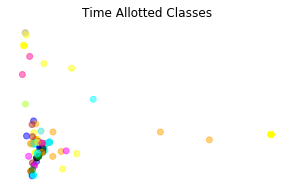

In [96]:
fig = plt.figure(figsize = (5,3))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('Time Allotted Classes')
plt.show()

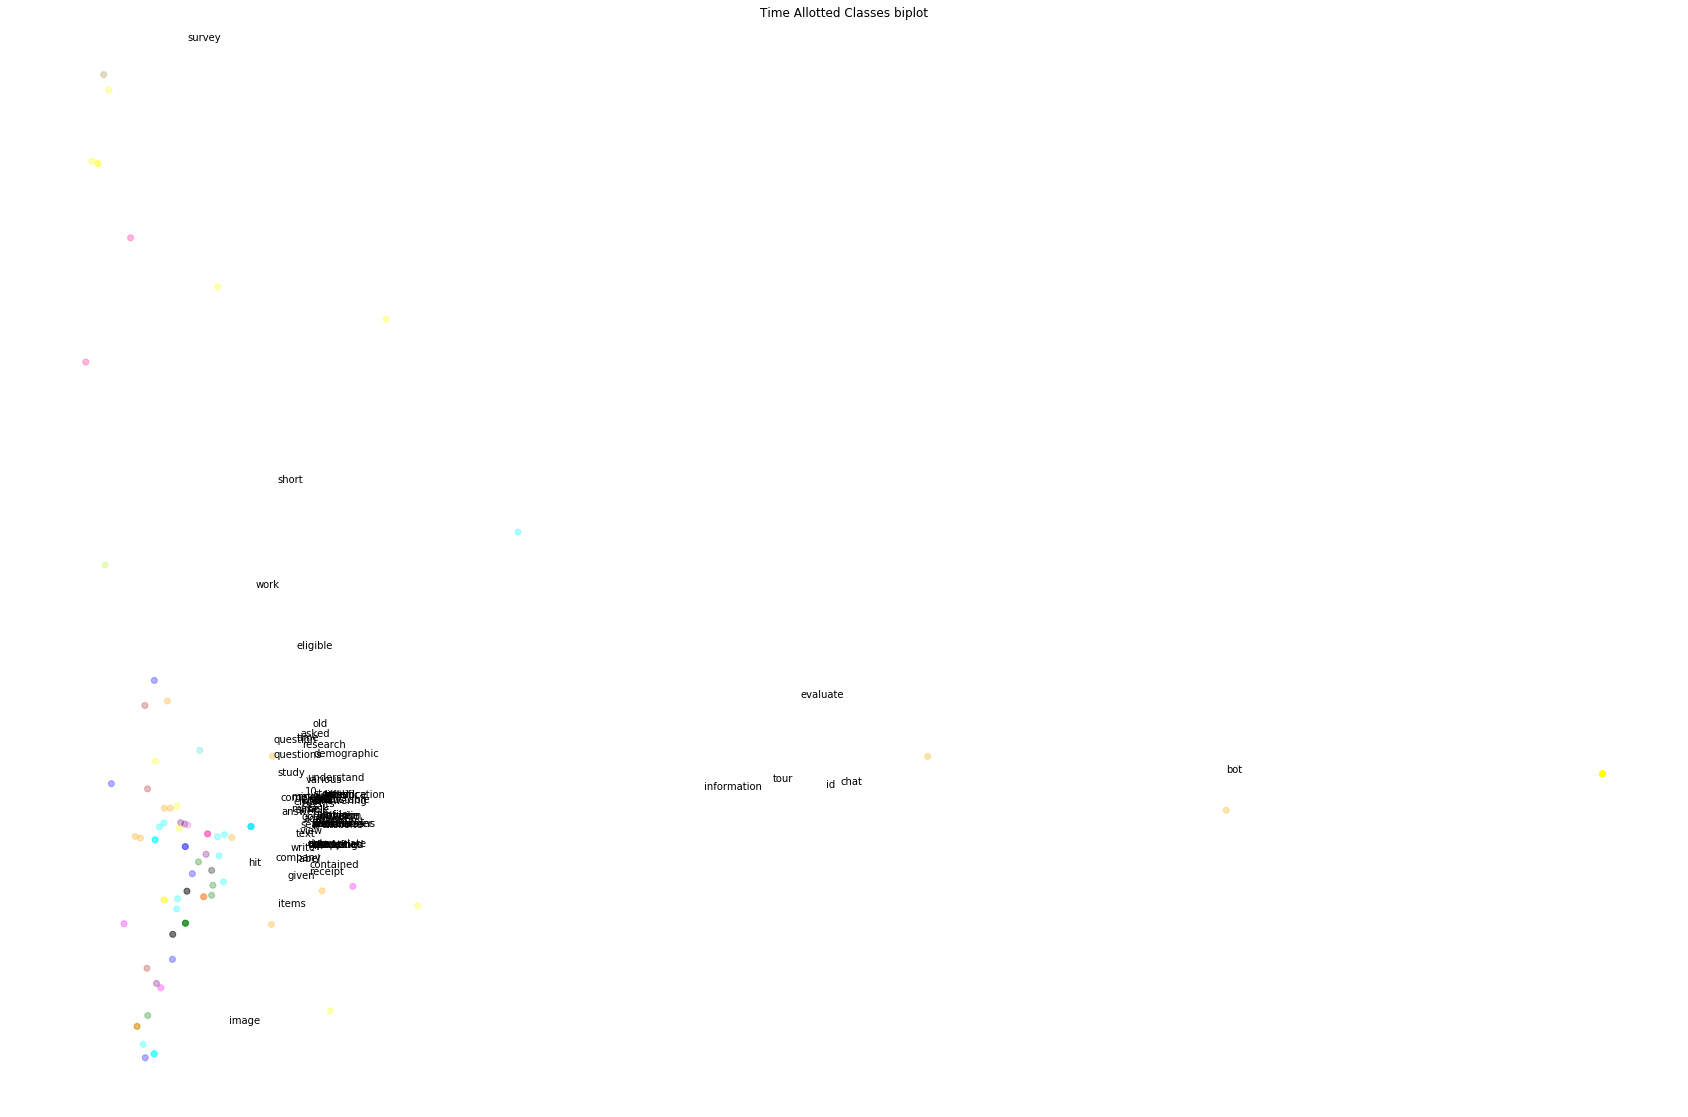

In [97]:
fig = plt.figure(figsize = (30,20))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.3, label = colors)
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('Time Allotted Classes biplot')
plt.show()

These clusters are not interpretable.  Trying again with predicted clusters.

In [99]:
colors_p = [colordict[hitsTimeAllotted[l]] for l in km.labels_]

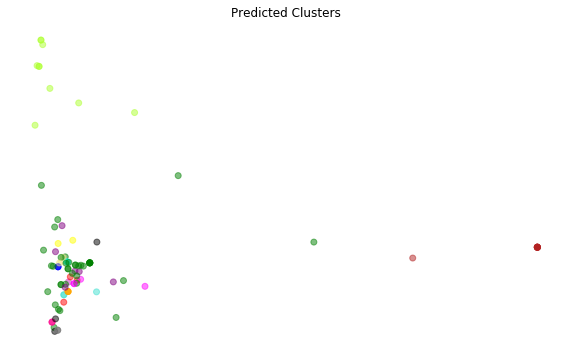

In [102]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters')
plt.show()

Here we can see one noticable pattern, which is that the 'greenyellow' category (35 Mins) are all gathered together in the upper left corner.

Using the Time Allotted for the clustering is not interpretable.

Selecting optimal cluster number using Sillhoutte analysis:

In [106]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


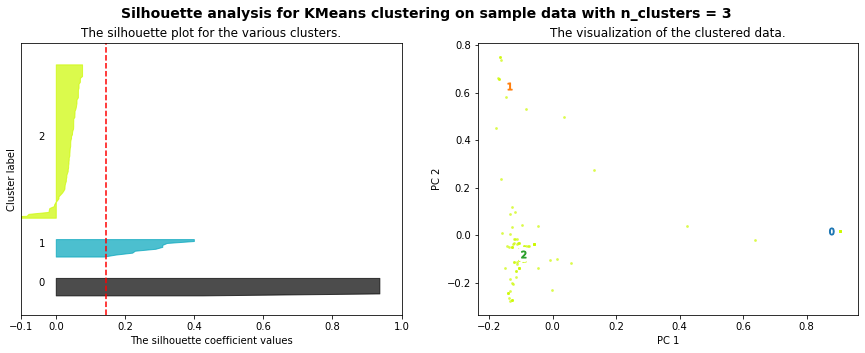

For n_clusters = 3, The average silhouette_score is : 0.145


In [109]:
X = hitsTFVects.toarray()
plotSilhouette(3, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


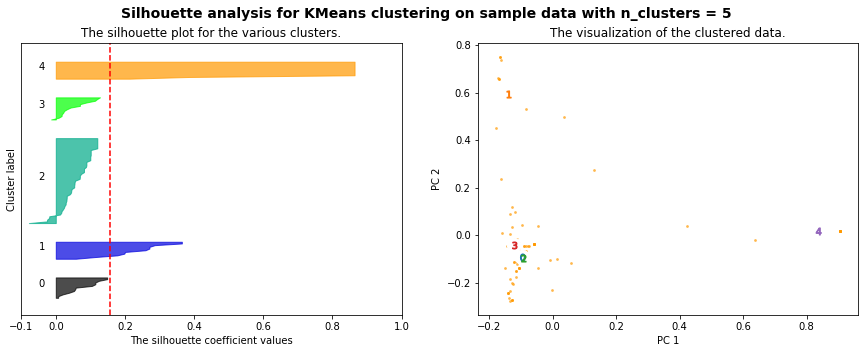

For n_clusters = 5, The average silhouette_score is : 0.157


In [116]:
X = hitsTFVects.toarray()
plotSilhouette(5, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


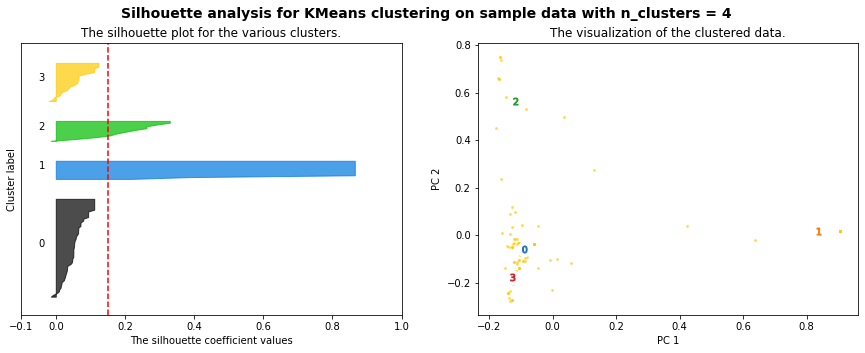

For n_clusters = 4, The average silhouette_score is : 0.151


In [124]:
X = hitsTFVects.toarray()
plotSilhouette(4, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


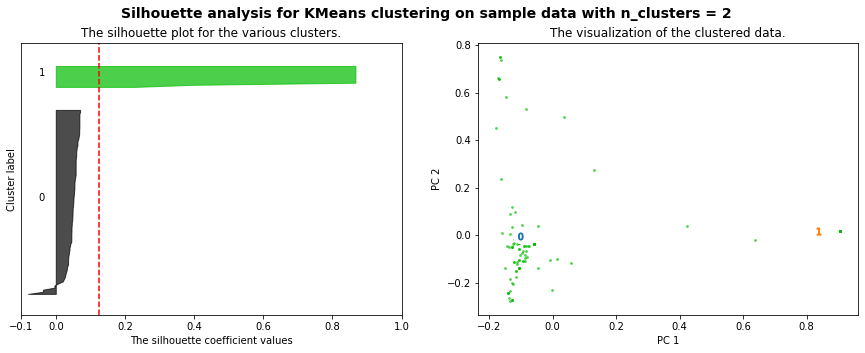

For n_clusters = 2, The average silhouette_score is : 0.125


In [125]:
X = hitsTFVects.toarray()
plotSilhouette(2, X)

The silhouette scores above suggest that the optimate number of clusters for this dataframe is 2.  However, even this number yields a high score and does not produce interpretable patterns.

This reveals that the documents used here are too small to produce features with enough overlapp that they can be modeled into coherent clusters.

# Hierarchical Clustering with Wald's Method

Next we approach a hierchical clustering method, which proposes nested clusters at any resolution (at the finest resolution, every document is its own cluster).

Here we must begin by calculating how similar the documents are to one another.

As a first pass, we take our matrix of word counts per document
`newsgroupsTFVects` and create a word occurrence matrix measuring how similar
the documents are to each other based on their number of shared words. (Note one could perform the converse operation, a document occurrence matrix measuring how similar  words are to each other based on their number of collocated documents).

In [109]:
newsgroupsTFVects

<2350x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 55644 stored elements in Compressed Sparse Row format>

In [110]:
newsgroupsTFVects[:100].todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.02540991, ..., 0.00684522, 0.00362269,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [111]:
newsgroupsCoocMat = newsgroupsTFVects * newsgroupsTFVects.T
#set the diagonal to 0 since we don't care how similar texts are to themselves
newsgroupsCoocMat.setdiag(0)
#Another way of relating the texts is with their cosine similarity
#newsgroupsCosinMat1 = 1 - sklearn.metrics.pairwise.cosine_similarity(newsgroupsTFVects)
#But generally word occurrence is more accurate


/Users/bhargavvader/open_source/Content-Analysis-2020/venv/lib/python3.5/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Now we can compute a tree of nested clusters. Here we will only look at the first 50 texts of each class because drawing the dendrograms can be computationally intensive (and visually complex).

In [112]:
selectIndices = []
indexToCat = []
for c in set(newsgroupsDF['category']):
    selectIndices += list(newsgroupsDF[newsgroupsDF['category'] == c].index)[:50]
    indexToCat += [c] * 50
    #.groupby('category').sum()

In [113]:
subCoocMat = newsgroupsCoocMat[selectIndices,:][:,selectIndices]

In [114]:
linkage_matrix = scipy.cluster.hierarchy.ward(subCoocMat.toarray())
linkage_matrix[:10]

/Users/bhargavvader/open_source/Content-Analysis-2020/venv/lib/python3.5/site-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([[ 43.        ,  45.        ,   0.        ,   2.        ],
       [ 48.        , 200.        ,   0.        ,   3.        ],
       [176.        , 201.        ,   0.        ,   4.        ],
       [105.        , 202.        ,   0.37033177,   5.        ],
       [ 19.        , 154.        ,   0.40914841,   2.        ],
       [110.        , 144.        ,   0.44134524,   2.        ],
       [ 12.        , 149.        ,   0.45096656,   2.        ],
       [  1.        , 204.        ,   0.4553535 ,   3.        ],
       [167.        , 206.        ,   0.4650683 ,   3.        ],
       [102.        , 146.        ,   0.46944808,   2.        ]])

Now we can visualize the tree

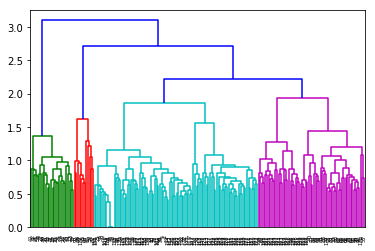

In [115]:
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)

This plot may seem somewhat unwieldy. To make it easier to read, we can cut the tree after a number of branchings.

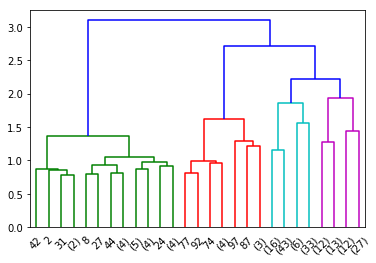

In [116]:
dendrogramDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, p=4, truncate_mode='level', get_leaves=True)

By default, the tree is colored to show the clusters based on their ['distance'](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram) from one another, but there are other ways of forming hierarchical clusters.

Another approach involves cutting the tree into `n` branches. We can do this with [`fcluster()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html#scipy.cluster.hierarchy.fcluster). Lets break the tree into 4 clusters. When we do this with all of the data in the dataframe, as below, we can add those clusters back for detailed evaluation.

In [117]:
hierarchicalClusters = scipy.cluster.hierarchy.fcluster(linkage_matrix, 4, 'maxclust')
hierarchicalClusters

array([4, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 4, 3, 3, 1, 1, 3,
       1, 3, 3, 1, 3, 4, 4, 4, 1, 4, 4, 4, 4, 2, 4, 4, 3, 4, 4, 4, 4, 4,
       3, 4, 2, 4, 4, 4, 3, 2, 2, 2, 4, 2, 4, 4, 3, 4, 2, 4, 4, 4, 4, 2,
       3, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4,
       3, 2, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3,
       3, 4], dtype=int32)

We can use this *get clusters* like we did with k-means. What if we do the full data set?

In [118]:
linkage_matrix_full = scipy.cluster.hierarchy.ward(newsgroupsCoocMat.toarray())
hierarchicalClusters_full = scipy.cluster.hierarchy.fcluster(linkage_matrix_full, 4, 'maxclust')
print("For our complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(newsgroupsDF['category'], hierarchicalClusters_full)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(newsgroupsDF['category'], hierarchicalClusters_full)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(newsgroupsDF['category'], hierarchicalClusters_full)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(newsgroupsDF['category'], hierarchicalClusters_full)))

For our complete clusters:
Homogeneity: 0.313
Completeness: 0.370
V-measure: 0.339
Adjusted Rand Score: 0.228


Not quite as good as k-means. Perhaps we've got too many words for Ward or maybe we shouldn't be using TFIDF as that compresses the space. Still, the hierarchical model places constraints on the clustering not present with k-means, which come at a cost. Finally, we can bring those cluster assignments back to the data frame for deeper investigation.

In [119]:
newsgroupsDF['wald_predictions'] = hierarchicalClusters_full
newsgroupsDF

,category,source_file,text,kmeans_predictions,wald_predictions
0,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,"\tIn certain Apple 13"" RGB monitors there has ...",0,4
1,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,Does anyone know how to reach Micron? I am in...,0,4
2,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,Hi there!\n\nCould some kind soul tell me what...,0,4
3,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,"""auto\nfrom",0,4
4,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,\n\n Don't believe the hype. There is no su...,0,4
5,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,What is the value of an SE (HDFD) 4/20?\n\n-David,0,4
6,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,\n\nF A Q !\n\nReference:\nNewsgroups: comp.sy...,0,4
7,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,"\n\n\n Nope. The Apple 16"" monitor does not...",0,4
8,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,\n\nIs it a hidden option? I'm using PowerStr...,0,3
9,comp.sys.mac.hardware,../data/scikit_learn_data/20news_home/20news-b...,\n\n\nThe previous article referred to the fac...,0,4


# Now let's do it with Senate press release data

We can also do hierarchical clustering with the Senate data. Let's start by creating the linkage matrix:

In [120]:
exampleCoocMat = exampleTFVects * exampleTFVects.T
exampleCoocMat.setdiag(0)
examplelinkage_matrix = scipy.cluster.hierarchy.ward(exampleCoocMat[:100, :100].toarray())

/Users/bhargavvader/open_source/Content-Analysis-2020/venv/lib/python3.5/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/Users/bhargavvader/open_source/Content-Analysis-2020/venv/lib/python3.5/site-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


And visualize the tree:

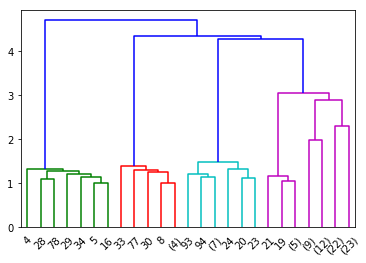

In [121]:
ax = scipy.cluster.hierarchy.dendrogram(examplelinkage_matrix, p=5, truncate_mode='level')

Now let's do it with the entire data frame.

In [122]:
example_linkage_matrix_full = scipy.cluster.hierarchy.ward(exampleCoocMat.toarray())
example_hierarchicalClusters_full = scipy.cluster.hierarchy.fcluster(example_linkage_matrix_full, 4, 'maxclust')

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that hierarchically cluster your documents using two approaches, and visualize them with a tree. Interrogate the recursive cluster contents in terms of both documents and closenesses. What does this nested cluster structure reveal about the organization of documents in your sampled corpora? Moreover, if they do worse than kmeans (as above), why do you think this is the case (hint: using metrics if you have ground truth or silhouette if you do not)? 

<span style="color:red">***Stretch***: Attempt using different distances into your clustering algorithms. (How) do they change the arrangement of clusters?

In [127]:
hitsTFVects

<100x92 sparse matrix of type '<class 'numpy.float64'>'
	with 438 stored elements in Compressed Sparse Row format>

In [128]:
hitsTFVects[:100].todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.54441168, 0.        , ..., 0.        , 0.45020616,
         0.        ],
        [0.        , 0.41673067, 0.        , ..., 0.43994538, 0.        ,
         0.        ]])

In [131]:
hitsCoocMat = hitsTFVects * hitsTFVects.T
#set the diagonal to 0 since we don't care how similar texts are to themselves
hitsCoocMat.setdiag(0)
#Another way of relating the texts is with their cosine similarity
#newsgroupsCosinMat1 = 1 - sklearn.metrics.pairwise.cosine_similarity(newsgroupsTFVects)
#But generally word occurrence is more accurate


In [134]:
selectIndices = []
indexToCat = []
for c in set(hitsDF['Time Allotted']):
    selectIndices += list(hitsDF[hitsDF['Time Allotted'] == c].index)[:50]
    indexToCat += [c] * 50
    #.groupby('Time Allotted').sum()

In [135]:
subCoocMat = hitsCoocMat[selectIndices,:][:,selectIndices]

In [136]:
linkage_matrix = scipy.cluster.hierarchy.ward(subCoocMat.toarray())
linkage_matrix[:10]

C:\Users\acmel\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([[  0.        ,   5.        ,   0.        ,   2.        ],
       [  6.        , 100.        ,   0.        ,   3.        ],
       [ 14.        , 101.        ,   0.        ,   4.        ],
       [ 16.        , 102.        ,   0.        ,   5.        ],
       [ 17.        , 103.        ,   0.        ,   6.        ],
       [ 75.        , 104.        ,   0.        ,   7.        ],
       [ 84.        , 105.        ,   0.4393244 ,   8.        ],
       [  4.        ,  61.        ,   0.61166963,   2.        ],
       [  2.        , 106.        ,   0.6268968 ,   9.        ],
       [  7.        ,  97.        ,   0.69564052,   2.        ]])

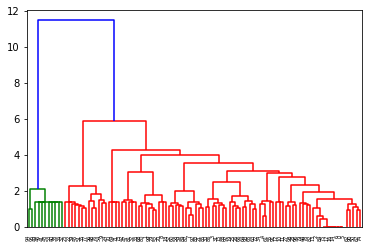

In [137]:
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)

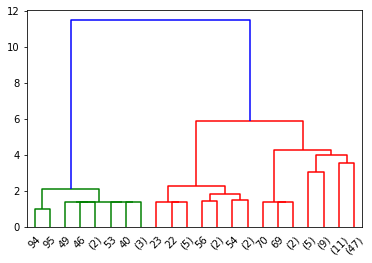

In [138]:
dendrogramDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, p=4, truncate_mode='level', get_leaves=True)

This tree corroborates the conclusions of the clustering section in exercise 1, namely, that the data categorized according to time allotted is best clustered into 2 different clusters.

In [150]:
hierarchicalClusters = scipy.cluster.hierarchy.fcluster(linkage_matrix, 2, 'maxclust')
hierarchicalClusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2], dtype=int32)

In [151]:
linkage_matrix_full = scipy.cluster.hierarchy.ward(hitsCoocMat.toarray())
hierarchicalClusters_full = scipy.cluster.hierarchy.fcluster(linkage_matrix_full, 2, 'maxclust')
print("For our complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(hitsDF['Time Allotted'], hierarchicalClusters_full)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(hitsDF['Time Allotted'], hierarchicalClusters_full)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(hitsDF['Time Allotted'], hierarchicalClusters_full)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(hitsDF['Time Allotted'], hierarchicalClusters_full)))

For our complete clusters:
Homogeneity: 0.059
Completeness: 0.386
V-measure: 0.102
Adjusted Rand Score: -0.014


These metrics are worse than the k-means.  It is unlikely that the problem is having too many words, so it must be something else.

In [152]:
hitsDF['wald_predictions'] = hierarchicalClusters_full
hitsDF

,Requester,Description,Price,Time Allotted,kmeans_predictions,wald_predictions
0,Computer Vision Turk,See Instructions (v.01).,$0.16,60 Min,3,2
1,James Billings,Attempt to complete market research surveys. Y...,$0.01,90 Min,6,2
2,Jiaxin,Paraphrase a machine-generated question to mak...,$0.10,30 Min,3,2
3,robinpraet,Label the requested items in the image,$0.06,60 Min,3,2
4,Content Research,View a short question asked by a reader of an ...,$0.05,20 Min,3,2
5,Phil Maher,Love discovering found footage? We have unseen...,$0.01,60 Min,3,2
6,Teampay MTurk,Goal: Produce cleaned version of company name ...,$0.02,1440 Min,13,2
7,HUGC,Generate a two question and answer pairs based...,$0.08,60 Min,7,2
8,Bright--Side,See a painting and (a) choose the feeling it p...,$0.07,15 Min,0,2
9,Danya Ariel-Boggs,Please confirm the type of educational organiz...,$0.03,60 Min,12,2


# Gensim

To do topic modeling we will also be using data from the [grimmer press releases corpus](ttps://github.com/lintool/GrimmerSenatePressReleases). To use the texts with gensim we need to create a `corpua` object, this takes a few steps. First we create a `Dictionary` that maps tokens to ids.

In [123]:
#Apply our functions
senReleasesTraining['tokenized_text'] = senReleasesTraining['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
senReleasesTraining['normalized_tokens'] = senReleasesTraining['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [124]:
senReleasesTraining[::100]

,Unnamed: 0,download_url,html_url,name,path,text,targetSenator,kmeans_predictions,tokenized_text,normalized_tokens
0,0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,01Apr2005Kennedy14.txt,raw/Kennedy/01Apr2005Kennedy14.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE...,Kennedy,1,"[FOR, IMMEDIATE, RELEASE, FOR, IMMEDIATE, RELE...","[immediate, release, immediate, release, conta..."
100,101,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,02Feb2006Kennedy8.txt,raw/Kennedy/02Feb2006Kennedy8.txt,FOR IMMEDIATE RELEASE Washington DC...,Kennedy,2,"[FOR, IMMEDIATE, RELEASE, Washington, DC, Toda...","[immediate, release, washington, dc, today, se..."
200,201,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,04May2006Kennedy7.txt,raw/Kennedy/04May2006Kennedy7.txt,FOR IMMEDIATE RELEASE FOR IMMEDI...,Kennedy,1,"[FOR, IMMEDIATE, RELEASE, FOR, IMMEDIATE, RELE...","[immediate, release, immediate, release, washi..."
300,301,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,06Jun2006Kennedy5.txt,raw/Kennedy/06Jun2006Kennedy5.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...,Kennedy,2,"[FOR, IMMEDIATE, RELEASE, FOR, IMMEDIATE, RELE...","[immediate, release, immediate, release, surpr..."
400,401,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,08Dec2006Kennedy4.txt,raw/Kennedy/08Dec2006Kennedy4.txt,FOR IMMEDIATE RELEASE Washington D ...,Kennedy,1,"[FOR, IMMEDIATE, RELEASE, Washington, D, C, To...","[immediate, release, washington, have, c, toda..."
500,501,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,09Nov2005Kennedy10.txt,raw/Kennedy/09Nov2005Kennedy10.txt,FOR IMMEDIATE RELEASE Washington ...,Kennedy,2,"[FOR, IMMEDIATE, RELEASE, Washington, DC, Toda...","[immediate, release, washington, dc, today, se..."
600,601,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,11Nov2005Kennedy5.txt,raw/Kennedy/11Nov2005Kennedy5.txt,FOR IMMEDIATE RELEASE On this Vet...,Kennedy,0,"[FOR, IMMEDIATE, RELEASE, On, this, Veteran, s...","[immediate, release, veteran, s, day, america,..."
700,701,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,13Jun2006Kennedy0.txt,raw/Kennedy/13Jun2006Kennedy0.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...,Kennedy,2,"[FOR, IMMEDIATE, RELEASE, FOR, IMMEDIATE, RELE...","[immediate, release, immediate, release, mr, c..."
800,801,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,15Dec2005Kennedy4.txt,raw/Kennedy/15Dec2005Kennedy4.txt,FOR IMMEDIATE RELEASE Washington ...,Kennedy,2,"[FOR, IMMEDIATE, RELEASE, Washington, DC, Toda...","[immediate, release, washington, dc, today, se..."
900,901,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,16May2007Kennedy10.txt,raw/Kennedy/16May2007Kennedy10.txt,FOR IMMEDIATE RELEASE WASHINGTON D ...,Kennedy,2,"[FOR, IMMEDIATE, RELEASE, WASHINGTON, D, C, Se...","[immediate, release, washington, have, c, sena..."


In [125]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

senReleasesTraining['reduced_tokens'] = senReleasesTraining['normalized_tokens'].apply(lambda x: dropMissing(x, senTFVectorizer.vocabulary_.keys()))

In [126]:
dictionary = gensim.corpora.Dictionary(senReleasesTraining['reduced_tokens'])

Then for each of the texts we create a list of tuples containing each token and its count. We will only use the first half of our dataset for now and will save the remainder for testing.

In [127]:
corpus = [dictionary.doc2bow(text) for text in senReleasesTraining['reduced_tokens']]

Then we serialize the corpus as a file and load it. This is an important step when the corpus is large.

In [128]:
gensim.corpora.MmCorpus.serialize('senate.mm', corpus)
senmm = gensim.corpora.MmCorpus('senate.mm')

Now we have a correctly formatted corpus that we can use for topic modeling and induction.

In [129]:
senlda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

We can inspect the degree to which distinct texts load on different topics. Here is one of the texts from the training set:

In [130]:
sen1Bow = dictionary.doc2bow(senReleasesTraining['reduced_tokens'][0])
sen1lda = senlda[sen1Bow]
print("The topics of the text: {}".format(senReleasesTraining['name'][0]))
print("are: {}".format(sen1lda))

The topics of the text: 01Apr2005Kennedy14.txt
are: [(3, 0.97342503)]


We can now see which topics our model predicts press releases load on and make this into a `dataFrame` for later analysis.

In [131]:
ldaDF = pandas.DataFrame({
        'name' : senReleasesTraining['name'],
        'topics' : [senlda[dictionary.doc2bow(l)] for l in senReleasesTraining['reduced_tokens']]
    })

This is a bit unwieldy so lets make each topic its own column:

In [132]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(senlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(senlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF[1::100]

,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
1,01Aug2005Kennedy12.txt,"[(0, 0.2372416), (2, 0.48075435), (3, 0.2601182)]",0.237242,0.0,0.480754,0.260118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
101,02Feb2007Kennedy10.txt,"[(0, 0.25670612), (2, 0.074774586), (4, 0.1747...",0.256706,0.0,0.074775,0.000000,0.174717,0.227300,0.000000,0.000000,0.263747,0.000000
201,04May2006Kennedy8.txt,"[(2, 0.18525754), (3, 0.7964857), (5, 0.016392...",0.000000,0.0,0.185258,0.796486,0.000000,0.016392,0.000000,0.000000,0.000000,0.000000
301,06Jun2007Kennedy1.txt,"[(4, 0.3363582), (7, 0.33487502), (8, 0.288408...",0.000000,0.0,0.000000,0.000000,0.336358,0.000000,0.000000,0.334875,0.288408,0.038981
401,08Feb2005Kennedy0.txt,"[(0, 0.23246183), (4, 0.54073346), (6, 0.22170...",0.232462,0.0,0.000000,0.000000,0.540733,0.000000,0.221704,0.000000,0.000000,0.000000
501,09Nov2005Kennedy11.txt,"[(3, 0.95548904)]",0.000000,0.0,0.000000,0.955489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
601,11Nov2005Kennedy6.txt,"[(0, 0.4027371), (9, 0.57299155)]",0.402737,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.572992
701,13Jun2006Kennedy1.txt,"[(6, 0.8887102), (9, 0.10867957)]",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.888710,0.000000,0.000000,0.108680
801,15Dec2005Kennedy5.txt,"[(2, 0.71216244), (3, 0.052720606), (4, 0.2194...",0.000000,0.0,0.712162,0.052721,0.219456,0.000000,0.014484,0.000000,0.000000,0.000000
901,16May2007Kennedy5.txt,"[(4, 0.38913283), (5, 0.569578)]",0.000000,0.0,0.000000,0.000000,0.389133,0.569578,0.000000,0.000000,0.000000,0.000000


Now let's visualize this for several (e.g., 10) documents in the corpus. First we'll subset the data:

In [133]:
ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = ldaDF[:10][['name']]
ldaDFVis = ldaDFV.as_matrix(columns=None)
ldaDFVisNames = ldaDFVisN.as_matrix(columns=None)
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.000000,0.00000,0.000000,0.973424,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,0.237242,0.00000,0.480754,0.260118,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2,0.000000,0.00000,0.000000,0.000000,0.845011,0.0,0.000000,0.0,0.000000,0.148858
3,0.000000,0.00000,0.000000,0.971368,0.000000,0.0,0.023263,0.0,0.000000,0.000000
4,0.000000,0.00000,0.997682,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
5,0.000000,0.99126,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
6,0.424055,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.566705,0.000000
7,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.967543
8,0.777248,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.209109
9,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.967552


First we can visualize as a stacked bar chart:

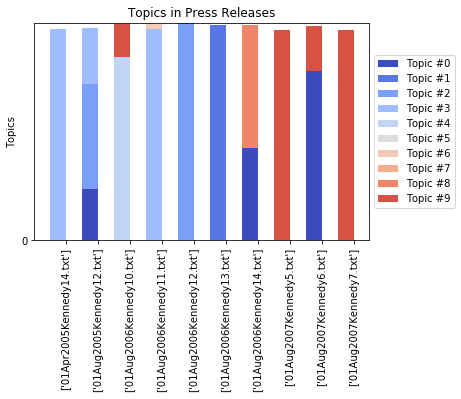

In [134]:
N = 10
ind = np.arange(N)
K = senlda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Press Releases')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

We can also visualize as a heat map:

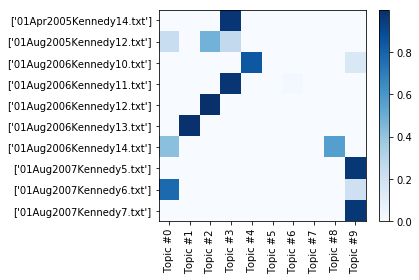

In [135]:
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

We can also look at the top words from each topic to get a sense of the semantic (or syntactic) domain they represent. To look at the terms with the highest LDA weight in topic `1` we can do the following:

In [136]:
senlda.show_topic(1)

[('wage', 0.0116434805),
 ('minimum', 0.008390752),
 ('worker', 0.007633167),
 ('fund', 0.0046470957),
 ('tax', 0.0031555935),
 ('ireland', 0.003118962),
 ('chip', 0.0030401899),
 ('fda', 0.002955216),
 ('northern', 0.0028156748),
 ('pension', 0.002781847)]

And if we want to make a dataFrame:

In [137]:
topicsDict = {}
for topicNum in range(senlda.num_topics):
    topicWords = [w for w, p in senlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,fund,wage,worker,fund,worker,troop,fund,immigration,worker,loan
1,minimum,minimum,fund,worker,head,fund,judge,fund,fund,worker
2,wage,worker,wage,liheap,pension,worker,wage,worker,troop,company
3,worker,fund,loan,cell,fund,teacher,loan,asbestos,unite,fda
4,loan,tax,train,minimum,loan,immigrant,worker,head,wage,fund
5,company,ireland,woman,stem,lender,fail,company,unite,judge,lender
6,attorney,chip,teacher,wage,unite,judge,agency,loan,medicare,aid
7,unite,fda,minimum,food,immigration,soldier,teacher,victim,company,head
8,bankruptcy,northern,employer,victim,agency,sick,science,border,employee,insurance
9,document,pension,pension,winter,company,send,fda,immigrant,iraqi,follow


We can see that several of the topics have the same top words, but there are definitely differences. We can try and make the topics more distinct by changing the $\alpha$ and $\eta$ parameters of the model. $\alpha$ controls the sparsity of document-topic loadings, and $\eta$ controls the sparsity of topic-word loadings.

We can make a visualization of the distribution of words over any single topic.

<Figure size 432x288 with 0 Axes>

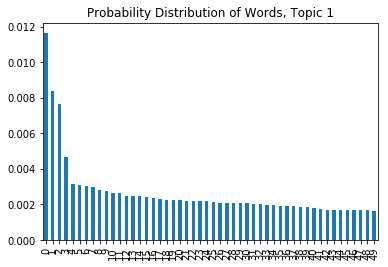

In [138]:
topic1_df = pandas.DataFrame(senlda.show_topic(1, topn=50))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()

See how different $\eta$ values can change the shape of the distribution.

In [139]:
senlda1 = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, eta = 0.00001)
senlda2 = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, eta = 0.9)

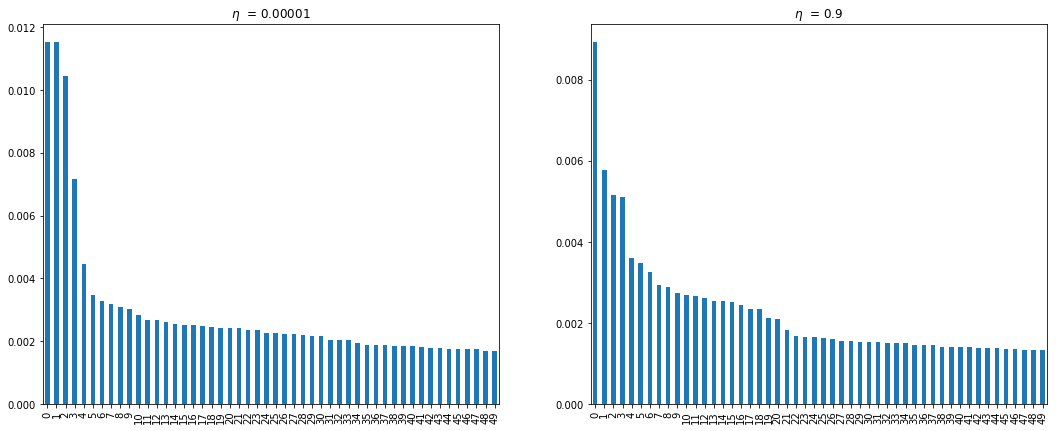

In [140]:
topic11_df = pandas.DataFrame(senlda1.show_topic(1, topn=50))
topic21_df = pandas.DataFrame(senlda2.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.00001')
topic21_df.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that topic model documents related to your anticipated final project. Interrogate and visually plot (e.g., as a bar graph?) the topic-word loadings and the document-topic loadings. What does this topic structure reveal about the distribution of contents across your documents? Systematically vary the $\alpha$, $\eta$, and topic number of the model for your text and describe in detail whether and how these changes led to distinctive outcomes, visible to you as analyst.  

<span style="color:red">**Stretch**: Cluster your documents, but instead of using words alone, use their topic loadings as an additional set of features. Do these topic loadings increase the apparent semantic coherence of your clusters?</span> 

In [154]:
targetTime = '30 Min'

senReleasesTraining = pandas.DataFrame()

#print("Fetching {}'s data".format(targetTime))
#targetDF = hitsDF
#targetDF['targetTime'] = targetTime
#hitsTraining = hitsTraining.append(targetDF, ignore_index = True)

#Watch out for weird lines when converting to csv
#one of them had to be removed from the Kennedy data so it could be re-read
#senReleasesTraining.to_csv("data/senReleasesTraining.csv")

hitsTraining = pandas.read_csv(r"C:\Users\acmel\OneDrive - The University of Chicago\SOCI 40133\Git and code files\100HITcsvs-2-10-20\1test5mk3c.csv")

hitsTraining[:5]

,Unnamed: 0,Requester,Description,Price,Time Allotted
0,0,Computer Vision Turk,See Instructions (v.01).,$0.16,60 Min
1,1,James Billings,Attempt to complete market research surveys. Y...,$0.01,90 Min
2,2,Jiaxin,Paraphrase a machine-generated question to mak...,$0.10,30 Min
3,3,robinpraet,Label the requested items in the image,$0.06,60 Min
4,4,Content Research,View a short question asked by a reader of an ...,$0.05,20 Min


In [157]:
hitsTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
hitsTFVects = hitsTFVectorizer.fit_transform(hitsTraining['Time Allotted'])
hitsTFVectorizer.vocabulary_.get(' Min')

In [158]:
targetDF = hitsTraining
timeColumn = 'Time Allotted'
numCategories = 16

In [159]:
#Apply our functions
hitsTraining['tokenized_times'] = hitsTraining['Time Allotted'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
hitsTraining['normalized_tokens'] = hitsTraining['tokenized_times'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [160]:
hitsTraining[::100]

,Unnamed: 0,Requester,Description,Price,Time Allotted,tokenized_times,normalized_tokens
0,0,Computer Vision Turk,See Instructions (v.01).,$0.16,60 Min,"[60, Min]",[min]


In [161]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

hitsTraining['reduced_tokens'] = hitsTraining['normalized_tokens'].apply(lambda x: dropMissing(x, hitsTFVectorizer.vocabulary_.keys()))

In [162]:
dictionary = gensim.corpora.Dictionary(hitsTraining['reduced_tokens'])

In [163]:
corpus = [dictionary.doc2bow(text) for text in hitsTraining['reduced_tokens']]

In [164]:
gensim.corpora.MmCorpus.serialize('hits.mm', corpus)
senmm = gensim.corpora.MmCorpus('hits.mm')

C:\Users\acmel\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [166]:
hitslda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

In [168]:
hits1Bow = dictionary.doc2bow(hitsTraining['reduced_tokens'][0])
hits1lda = senlda[hits1Bow]
print("The topics of the text: {}".format(hitsTraining['Time Allotted'][0]))
print("are: {}".format(hits1lda))

The topics of the text: 60 Min
are: [(0, 0.54720485), (1, 0.05053022), (2, 0.04904581), (3, 0.05201659), (4, 0.049045783), (5, 0.050530266), (6, 0.050035316), (7, 0.051025573), (8, 0.05003537), (9, 0.050530184)]


In [171]:
ldaDF = pandas.DataFrame({
        'Time Allotted' : hitsTraining['Time Allotted'],
        'topics' : [hitslda[dictionary.doc2bow(l)] for l in hitsTraining['reduced_tokens']]
    })

In [172]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(hitslda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(hitslda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF[1::100]

,Time Allotted,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
1,90 Min,"[(0, 0.048056986), (1, 0.050035), (2, 0.051520...",0.048057,0.050035,0.051521,0.049541,0.050035,0.05053,0.04954,0.05053,0.550176,0.050035


In [173]:
ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = ldaDF[:10][['Time Allotted']]
ldaDFVis = ldaDFV.as_matrix(columns=None)
ldaDFVisNames = ldaDFVisN.as_matrix(columns=None)
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.048058,0.050035,0.051521,0.049541,0.050035,0.050530,0.549183,0.05053,0.050530,0.050037
1,0.048057,0.050035,0.051521,0.049541,0.050035,0.050530,0.049540,0.05053,0.550176,0.050035
2,0.048057,0.050036,0.551167,0.049540,0.050035,0.050530,0.049540,0.05053,0.050530,0.050035
3,0.048057,0.050035,0.051521,0.049541,0.050035,0.050530,0.049540,0.05053,0.050530,0.549680
4,0.048057,0.050035,0.551167,0.049540,0.050035,0.050530,0.049540,0.05053,0.050530,0.050035
5,0.048057,0.050035,0.051521,0.549185,0.050035,0.050530,0.049541,0.05053,0.050530,0.050035
6,0.048057,0.050035,0.551167,0.049540,0.050035,0.050530,0.049540,0.05053,0.050530,0.050035
7,0.048059,0.549677,0.051521,0.049541,0.050035,0.050531,0.049540,0.05053,0.050530,0.050035
8,0.048057,0.050035,0.051521,0.049541,0.050035,0.050530,0.049540,0.05053,0.550176,0.050035
9,0.048057,0.549663,0.051537,0.049541,0.050035,0.050530,0.049540,0.05053,0.050530,0.050035


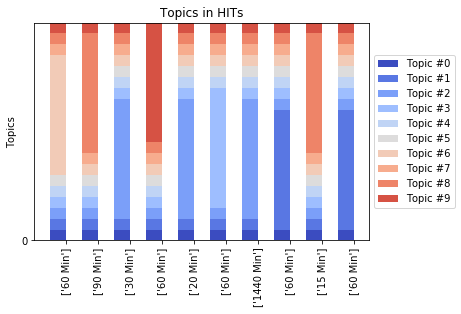

In [174]:
N = 10
ind = np.arange(N)
K = hitslda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in HITs')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

The breakdown of topics here is interesting, as it shows a relatively binary distribution of topics in the HITs for each different Time.

The 90 min, and 15 min HITs predominently feature Topics 9-6; while HITs with 30 mins, 20 mins and 1440 mins are mostly comprised of Topics 0-4.

For some reason the 60 min HITs were split between 4 bars.  Half of these fall into the former topic distribution, and the other half fall into the latter.


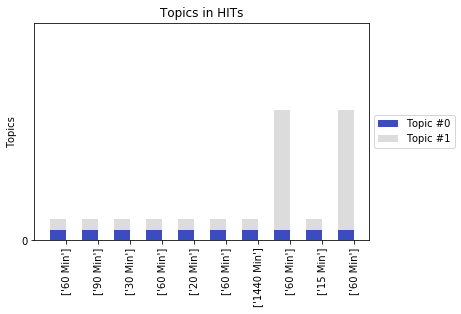

In [180]:
#adjusting values
N = 10
ind = np.arange(N)
K = 2  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in HITs')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

Limiting the number of Topics to 2, in an attempt to further isolate the binary distribution observed above.  The result shows that, of the 4 separate 60 min HIT groups, two of them overwhelmingly represent Topic 1 while all other groups have equal distribution of Topics 1 and 0.  

## Extending Topic Models within broader research pipelines

Topic models can be the base of more complex analysis. One good example is the paper - Individuals, institutions, and innovation in the debates of the French Revolution (https://www.pnas.org/content/115/18/4607), where they use topic models to find similarities and differences between the topics of different individuals. Let us revisit this idea using the Soap opera database. Who innovates and influences the most within the Soap?

The next few lines of code follows the same process as last weeks notebook. Please visit the old notebook to read descriptions of the code if you have forgotten what it does.

In [141]:
corpora_address = "/Users/bhargavvader/Downloads/Academics_Tech/corpora/SOAP"

In [142]:
soap_texts = lucem_illud_2020.loadDavies(corpora_address, num_files=2000)

text_7-jss.zip
text_6-egn.zip
text_5-rag.zip
text_2-wts.zip
text_3-pem.zip
text_4-jfy.zip
text_8-sbo.zip
text_9-jtw.zip
text_0-tez.zip
text_1-teh.zip


In [143]:
import zipfile
import pandas as pd

In [144]:
zfile = zipfile.ZipFile(corpora_address + "/soap_sources.zip")
source = []

In [145]:
for file in zfile.namelist():
    with zfile.open(file) as f:
        for line in f:
            source.append(line)

In [146]:
soap_dict = {}

In [147]:
for soap in source[3:]:
    try:
        textID, year, show, url = soap.decode("utf-8").split("\t")
    except UnicodeDecodeError:
        continue
    if show.strip() not in soap_dict:
        soap_dict[show.strip()] = []
    if show.strip() in soap_dict:
        try:
            soap_dict[show.strip()].append(soap_texts[textID.strip()])
        except KeyError:
            continue

In [148]:
soap_dict.keys()

dict_keys(['One Life to Live', 'Guiding Light', 'Passions', 'Young and Restless', 'As the World Turns', 'General Hospital', 'All My Childen', 'Port Charles', 'Bold and Beautiful', 'Days of Our Lives'])

In [149]:
soap_df = pd.DataFrame(columns=["Soap Name", "Tokenized Texts"])

In [150]:
i = 0

In [151]:
for soap in soap_dict:
    # since there were multiple lists
    print(soap)
    full_script = []
    for part in soap_dict[soap]:
        full_script = full_script + part
    soap_df.loc[i] = [soap, full_script]
    i += 1

One Life to Live
Guiding Light
Passions
Young and Restless
As the World Turns
General Hospital
All My Childen
Port Charles
Bold and Beautiful
Days of Our Lives


In [152]:
soap_df

,Soap Name,Tokenized Texts
0,One Life to Live,"[@!Rae, What, She, even, has, a, new, friend, ..."
1,Guiding Light,"[@!Reva, Well, it, 's, very, peaceful, Your, b..."
2,Passions,"[@!Kay, Going, to, get, pregnant, and, I, 'm, ..."
3,Young and Restless,"[@!Sharon, Yeah, I, could, n't, sleep, @!Victo..."
4,As the World Turns,"[@!Katie, Simon, where, are, you, @!Simon, Kat..."
5,General Hospital,"[@!Stefan, I, love, her, @!Jax, No, Cassadine,..."
6,All My Childen,"[@!Liza, You, 're, in, early, @!Ryan, Yeah, I,..."
7,Port Charles,"[@!Jack, There, you, are, you, son, @!Chris, H..."
8,Bold and Beautiful,"[@!Morgan, What, 's, the, matter, Stephanie, Y..."
9,Days of Our Lives,"[@!Philip, Seems, like, every, time, I, look, ..."


Checking to see which index I should use. In my example it is the last one, so I choose my index as 9. It might be different for you!

In [153]:
dool = soap_df['Tokenized Texts'][9]

In [154]:
' '.join(dool[0:1500])

"@!Philip Seems like every time I look at you tonight you 're crying @!Chloe Tears of happiness I always thought that when I read Tears of Happiness what a crock But tonight you prove to me that they really do exist @!Philip I just carved our initials on that tree @!Chloe But it was so much more than that You took this angry outsider and you made her feel like a girl in a movie or a book a happy movie or a book @!Philip That 's what you deserve to be What gets me is that you do n't even realize how special you are @!Chloe All my life the word special was code for too weird for words And now here you are this great looking guy with a normal life and you make me believe like you really actually want me around @!Philip Oh that 's only half true @!Chloe Oh I 'm sorry @!Philip Oh no Chloe I want you around forever That 's so true but 's not true at all Except for you there 's nothing normal at all about my life @!Brenda We got to get the labs back on 23 @!Woman I 'll grab them @!Brenda Okay

In [155]:
characters = {}
for token in dool:
    if token[0] == '@':
        # all characters or actions start with @, so we add that to character
        if token[2:] not in characters:
            characters[token[2:]] = 0
        if token[2:] in characters:
            characters[token[2:]] += 1

In [156]:
import networkx as nx

In [157]:
actor_network = nx.Graph()

In [158]:
for character in characters:
    if characters[character] > 2000:
        actor_network.add_node(character, lines_spoken= characters[character], words=[])

In [159]:
i = 0

In [160]:
all_texts = []

In [161]:
for token in dool:
    i += 1
    if i > len(dool):
        break
    if token[0] == "@":
        if token[2:] in actor_network.nodes():
            j = i
            for token_ in dool[i:]:
                if token_[0] == "@":
                    # if both the characters exist in the graph, add a weight
                    if token_[2:] != token[2:] and token_[2:] in actor_network.nodes():
                        if (token[2:], token_[2:]) not in actor_network.edges():
                            actor_network.add_edge(token[2:], token_[2:], weight=0)
                        if (token[2:], token_[2:]) in actor_network.edges():
                            actor_network.edges[(token[2:], token_[2:])]['weight'] += 1
                    break
                j += 1
            # adding characters sentences
            actor_network.nodes[token[2:]]['words'].append(dool[i:j])
            all_texts.append(lucem_illud_2020.normalizeTokens(dool[i:j]))

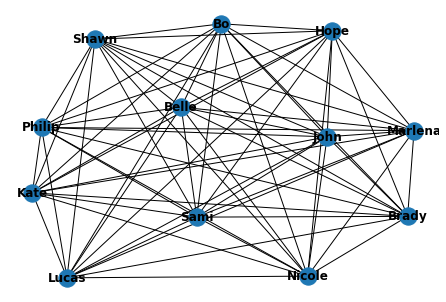

In [162]:
nx.draw(actor_network, with_labels=True, font_weight='bold')

Ok - so we have our graph now. Let us create a topic model with all the texts spoken by the characters, see what's being spoken about, and construct topic distributions for each character. What does our all_texts corpus look like?

In [163]:
all_texts[0:10]

[['like', 'time', 'look', 'tonight', 'cry'],
 ['carve', 'initial', 'tree'],
 ['deserve', 'get', 'realize', 'special'],
 ['oh', 'half', 'true'],
 ['oh', 'chloe', 'want', 'forever', 'true', 'true', 'normal', 'life'],
 ['great', 'concentrate', 'search', 'downriver', 'work', 'way'],
 ['right', 'underwater'],
 [],
 ['have', 'come', 'soon', 'hear'],
 ['know', 'guy', 'okay']]

In [164]:
dictionary = gensim.corpora.Dictionary(all_texts)

In [165]:
corpus = [dictionary.doc2bow(text) for text in all_texts]

In [166]:
gensim.corpora.MmCorpus.serialize('dool.mm', corpus)
doolcorpus = gensim.corpora.MmCorpus('dool.mm')

In [167]:
doollda = gensim.models.ldamodel.LdaModel(corpus=doolcorpus, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

In [168]:
doollda.show_topics()

[(0,
  '0.130*"na" + 0.120*"gon" + 0.090*"be" + 0.042*"love" + 0.028*"wait" + 0.025*"hmm" + 0.021*"say" + 0.018*"mm" + 0.017*"carrie" + 0.016*"mmm"'),
 (1,
  '0.070*"like" + 0.038*"talk" + 0.036*"dad" + 0.033*"time" + 0.032*"try" + 0.027*"chuckle" + 0.025*"be" + 0.023*"look" + 0.023*"listen" + 0.020*"gun"'),
 (2,
  '0.124*"know" + 0.068*"think" + 0.060*"want" + 0.051*"tell" + 0.025*"go" + 0.016*"come" + 0.014*"be" + 0.013*"mean" + 0.013*"happen" + 0.012*"sami"'),
 (3,
  '0.044*"good" + 0.035*"mean" + 0.031*"think" + 0.028*"stefano" + 0.028*"know" + 0.024*"thing" + 0.021*"believe" + 0.020*"like" + 0.017*"way" + 0.015*"lucas"'),
 (4,
  '0.091*"need" + 0.056*"rafe" + 0.053*"help" + 0.030*"course" + 0.029*"leave" + 0.022*"sydney" + 0.022*"test" + 0.021*"bye" + 0.020*"shoot" + 0.020*"ej"'),
 (5,
  '0.133*"yes" + 0.076*"be" + 0.041*"sorry" + 0.037*"get" + 0.026*"know" + 0.020*"well" + 0.014*"feel" + 0.012*"worry" + 0.010*"mean" + 0.010*"glad"'),
 (6,
  '0.063*"john" + 0.059*"stop" + 0.035*"n

Are your topics interpretable/interesting? Sometimes they require a good deal of fine tuning and parameter choosing to get it to work in a nice way. Check out the gensim ldamodel documentation page and see what parameters you can play around with and try the model again!

In [169]:
for actor in actor_network.nodes():
    actor_all_words = []
    for sent in actor_network.nodes[actor]['words']:
        for word in sent:
            actor_all_words += word
    actor_network.nodes[actor]['topic_distribution'] = doollda[dictionary.doc2bow(lucem_illud_2020.normalizeTokens(actor_all_words))]

We now have topic distributions for each character. Let us have a brief look at what the characters are talking about. 

In [170]:
for actor in actor_network.nodes():
    print(actor_network.nodes[actor]['topic_distribution'])

[(0, 0.04434908), (1, 0.1636655), (2, 0.17168337), (3, 0.07303326), (5, 0.18090375), (7, 0.16316645), (8, 0.049669832), (9, 0.15352708)]
[(0, 0.04564287), (1, 0.15994014), (2, 0.166935), (3, 0.07172846), (5, 0.18492804), (7, 0.16686365), (8, 0.052410174), (9, 0.15154955)]
[(0, 0.045564834), (1, 0.161894), (2, 0.16576263), (3, 0.068994306), (5, 0.18667614), (7, 0.18113962), (8, 0.048315547), (9, 0.14165114)]
[(0, 0.051611815), (1, 0.1611779), (2, 0.1781671), (3, 0.07053677), (5, 0.1791648), (7, 0.16717589), (8, 0.048152395), (9, 0.14401132)]
[(0, 0.047252756), (1, 0.16661952), (2, 0.17018682), (3, 0.06864313), (5, 0.18384352), (7, 0.16521569), (8, 0.05054304), (9, 0.14769368)]
[(0, 0.046162076), (1, 0.15438502), (2, 0.16620177), (3, 0.07256862), (5, 0.1968395), (7, 0.16062519), (8, 0.053342965), (9, 0.14987314)]
[(0, 0.04524269), (1, 0.16827387), (2, 0.17442298), (3, 0.07023772), (5, 0.1848608), (7, 0.16046369), (8, 0.04732241), (9, 0.1491746)]
[(0, 0.045984045), (1, 0.16086726), (2, 0.

Quickly eye-balling these distributions suggest that the model itself could be tuned better - all the topics are loaded more or less equally. 

In the paper I linked to earlier, they found similarities or differences using the KL divergence - this is a topic we've dealt with before. Let us plot a heatmap with these values.

In [171]:
from gensim.matutils import kullback_leibler

In [172]:
def convert_to_prob(bow):
    ps = []
    for topic_no, topic_prob in bow:
        ps.append(topic_prob)
    return ps

In [173]:
L = []
for actor_1 in actor_network.nodes():
    p = actor_network.nodes[actor_1]['topic_distribution'] 
    p = convert_to_prob(p)
    l = []
    for actor_2 in actor_network.nodes():
        q = actor_network.nodes[actor_2]['topic_distribution'] 
        q = convert_to_prob(q)
        l.append(kullback_leibler(p, q))
    L.append(l)
M = np.array(L)

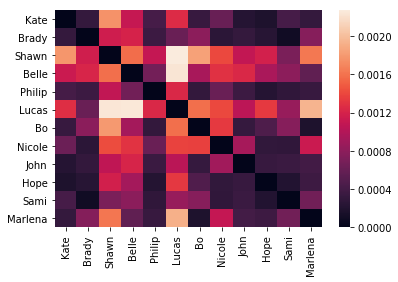

In [174]:
fig = plt.figure()
div = pandas.DataFrame(M, columns = list(actor_network.nodes()), index = list(actor_network.nodes()))
ax = sns.heatmap(div)
plt.show()

This is one example of how we can use topic models to analyse a network - what other data exploration can you come up with?  Maybe see what are the themes surrounding the top topics for each of the actors? You now have the infrastructure to explore the network and the topics. Gensim has a great set of Jupyter Notebooks which illustrate their methods and functions - https://github.com/RaRe-Technologies/gensim/tree/develop/docs/notebooks. The Auto Examples page also has a good variety of examples - https://radimrehurek.com/gensim/auto_examples/. 


### Dynamic Topic Modelling

Dynamic Topic Modelling is a time based topic model method introduced by David Blei and John Lafferty. It allows one to see topics evolve over a time annotated corpus. I would recommend first viewing the Dynamic Topic Model tutorial on Gensim (https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/ldaseqmodel.ipynb) to understand what exactly it's about. 

(An acknowledgement - Bhargav wrote the code for Gensim's Dynamic Topic Models back in 2016 as a Google Summer of Code student, and they're still using it as are thousands of others!)

To demonstrate it on a time based corpus, we will create a corpus from COHA.

In [4]:
corpora_address = "/Users/bhargavvader/Downloads/Academics_Tech/corpora/COHA"

In [5]:
coha_texts = lucem_illud_2020.loadDavies(corpora_address, return_raw=True)

text_1940s_bsw.zip
text_1920s_gte.zip
text_1900s_mse.zip
text_1810s_kso.zip
text_2000s_scc.zip
text_1910s_jue.zip
text_1890s_jsq.zip
text_1870s_vuy.zip
text_1840s_nsq.zip
text_1860s_psi.zip
text_1950s_ndz.zip
text_1820s_jsi.zip
text_1980s_bkk.zip
text_1930s_bie.zip
text_1960s_xus.zip
text_1990s_bsj.zip
text_1830s_bsu.zip
text_1850s_jpr.zip
text_1970s_jfy.zip
text_1880s_azz.zip


In [6]:
list(coha_texts.keys())[0:5]

['mag_1942_151505.txt',
 'mag_1925_300619.txt',
 'mag_1973_479429.txt',
 'mag_2004_365045.txt',
 'mag_1929_254298.txt']

We'd have to approach this differently: note that while extracting the corpus we returned the raw texts (a new functionality in lucem_illud_2020), and the dictionary keys already contain some useful information: the year published, and the genre. neat! We can now create some corpora, organised by year and by genre.

In [7]:
coha_genres = {}
coha_years = {}

In [8]:
for article in coha_texts:
    genre, year, id_ = article.split("_")
    if genre not in coha_genres:
        coha_genres[genre] = []
    if genre in coha_genres:
        coha_genres[genre].append(coha_texts[article])
    
    if year not in coha_years:
        coha_years[year] = []
    if year in coha_years:
        coha_years[year].append(coha_texts[article])
    

In [9]:
coha_genres.keys()

dict_keys(['nf', 'mag', 'fic', 'news'])

In [10]:
coha_years.keys()

dict_keys(['1979', '2007', '1989', '1893', '1968', '1887', '1931', '1976', '1918', '1815', '1860', '1852', '1953', '1847', '2001', '1901', '1912', '1826', '1883', '1881', '2000', '1853', '1892', '1999', '1867', '1914', '1869', '1898', '1973', '1975', '1839', '2004', '1928', '1814', '1909', '1950', '1840', '1832', '1831', '1819', '1991', '1998', '1955', '1990', '1904', '1871', '1897', '1866', '1994', '1945', '1923', '1829', '1873', '1811', '1978', '1921', '1838', '1825', '1844', '1878', '1907', '1886', '1882', '1995', '1967', '1888', '1925', '1980', '1834', '2006', '1966', '1818', '1992', '1957', '1870', '1939', '1824', '1963', '1900', '1876', '1920', '1910', '1937', '1863', '1948', '1954', '1961', '1880', '1848', '1922', '2008', '1938', '1810', '1817', '1842', '1919', '1851', '1895', '1956', '1891', '1997', '1841', '1983', '1969', '1982', '1959', '1971', '1822', '1865', '1859', '2003', '1924', '1916', '1812', '1947', '1855', '1902', '1885', '1868', '1934', '1827', '1843', '1970', '1930

That's neat: we have 4 genres and 200 years. We have to now decide how many time slices we want. Let us see how the corpus is distributed.

If you went through the tutorial, you would notice how we would need to arrange the corpora year wise.
We also have to arrange the number of topics per year.

In [11]:
import collections

In [12]:
years = []
year_lens = []

In [13]:
for year_info in collections.OrderedDict(sorted(coha_years.items())):
    years.append(year_info)
    year_lens.append(len((coha_years[year_info])))

In [14]:
years[0], years[-1]

('1810', '2009')

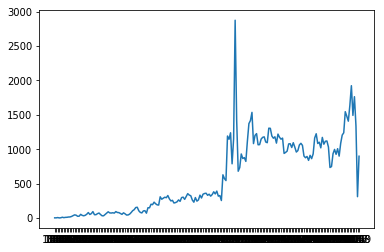

In [15]:
import matplotlib.pyplot as plt
plt.plot(years, year_lens)

The X axis isn't legible, but you can get the point: there are far less articles in the beginning, and then it grows. Maybe in our 5 time slices, we do: 1810-1880, 1881-1913, 1914-1950, 1950-1990, 1990-2009?
I use some historical intuition to use these time periods, you are encouraged to try your different time slices (for e.g, 20 10 year periods, 10 20 year periods, by total number of papers, etc)

In [16]:
all_texts_coha = []
docs_per_timeslice = [0, 0, 0, 0, 0]
i = 0

In [17]:
for year_info in collections.OrderedDict(sorted(coha_years.items())):
    large_files = 0
    for article in coha_years[year_info]:
        try:
            if len(article[2]) < 1500000:
                all_texts_coha.append(lucem_illud_2020.normalizeTokens(article[2].decode("utf-8")))
            if len(article[2]) >= 1500000:
                large_files += 1
        except IndexError:
            continue
    # these numbers are the number of years in the 
    if i < 70:
        docs_per_year[0] += len(coha_years[year_info]) - large_files
    if i >= 70 and i < 103:
        docs_per_year[1] += len(coha_years[year_info]) - large_files
    if i >= 103 and i < 140:
        docs_per_year[2] += len(coha_years[year_info]) - large_files
    if i >= 140 and i < 180:
        docs_per_year[3] += len(coha_years[year_info]) - large_files
    if i >= 180:
        docs_per_year[4] += len(coha_years[year_info]) - large_files
    i += 1

#### Smaller Corpora

The original size of the corpus is wayyy too big for our laptops. Let us demo this with a smaller size. You are welcome to try different sizes until you get the size you would like.
I am using a 100 documents per time slice for this example.

In [18]:
def choose_n(corpus, time_slices, nums=100):
    new_corpus = corpus[0:nums]
    for time_slice in time_slices[:-1]:
        new_corpus = new_corpus + corpus[time_slice:time_slice+nums]
    return new_corpus

Now, COHA also has some really large files, full books and the like: we're going to now split up really large files such that each of the documents are only 1000 tokens long. This function will return a split up document and the number of files it has been split into, so we can accordingly adjust the documents per time slice, which is important for Dynamic Topic Modelling to work.

In [19]:
def split_up(document, doc_size=1000):
    new_docs = [document[i:i + doc_size] for i in range(0, len(document), doc_size)]
    return(new_docs, len(new_docs))

In [20]:
small_corpus = choose_n(all_texts_coha, docs_per_year, nums=100)

In [41]:
final_corpus= []

In [42]:
docs_per_time_slice = [0, 0, 0, 0, 0]

I now use the split method to create my final corpus. Note that I hardcode values for the time slice to figure out the number of documets per time slice. Now I have a representative number of documents in each time slice. 

In [43]:
for i, article in enumerate(small_corpus):
    # identify time slice based on article number 
    if i < 100:
        time = 0
    if i > 100 and i <= 200:
        time = 1
    if i > 200 and i <= 300:
        time = 2
    if i > 300 and i <= 400:
        time = 3
    if i > 400 and i <= 500:
        time = 4
        
    if len(article) > 1000:
        split_docs, no_docs = split_up(article)
        for doc in split_docs:
            final_corpus.append(doc)
        docs_per_time_slice[time] += no_docs
    else:
        final_corpus.append(article)
        docs_per_time_slice[time] += 1
    # just a check if the counts are correctly added
    if np.sum(docs_per_time_slice) != len(final_corpus):
        print(np.sum(docs_per_time_slice), len(final_corpus))

In [46]:
dictionary = gensim.corpora.Dictionary(final_corpus)

In [47]:
corpus = [dictionary.doc2bow(text) for text in final_corpus]

In [48]:
gensim.corpora.MmCorpus.serialize('coha.mm', corpus)
cohacorpus = gensim.corpora.MmCorpus('coha.mm')

In [49]:
from gensim.models import ldaseqmodel

In [55]:
ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=docs_per_time_slice, num_topics=4)

/Users/bhargavvader/open_source/Content-Analysis-2020/venv/lib/python3.5/site-packages/gensim/models/ldaseqmodel.py:293: RuntimeWarning: divide by zero encountered in double_scalars
  convergence = np.fabs((bound - old_bound) / old_bound)


In [64]:
ldaseq.print_topics(time=0)[1]

[('state', 0.009231335276472926),
 ('man', 0.007395542533241843),
 ('great', 0.005407621887489939),
 ('power', 0.00466463108865709),
 ('time', 0.004145275353013492),
 ('government', 0.0038469615335645527),
 ('mr', 0.003784442892543364),
 ('people', 0.0034467994219777665),
 ('law', 0.0034071786078579145),
 ('new', 0.0030027721654430216),
 ('war', 0.002999489239112416),
 ('say', 0.0029620122071219437),
 ('year', 0.0027265764876598106),
 ('country', 0.0026961884570141158),
 ('general', 0.0026385043499987542),
 ('subject', 0.0025921116091278027),
 ('unite', 0.00243013848020865),
 ('interest', 0.0023961925608540803),
 ('mean', 0.002356244385602689),
 ('present', 0.002327481410279418)]

In [65]:
 ldaseq.print_topics(time=4)[1]

[('state', 0.009063458198506274),
 ('great', 0.005281951052175197),
 ('man', 0.0048113539761249395),
 ('power', 0.004484111341699211),
 ('time', 0.004380730260383426),
 ('mr', 0.004363448261206658),
 ('war', 0.0036676379920160007),
 ('government', 0.003660707892751022),
 ('law', 0.003608034898098456),
 ('people', 0.0035690690199701143),
 ('say', 0.0033669920336640846),
 ('new', 0.003254656714598662),
 ('year', 0.0030063559964820033),
 ('right', 0.002722402127793679),
 ('country', 0.0026929936555686994),
 ('unite', 0.0026207546725993914),
 ('president', 0.0026030905455171633),
 ('general', 0.0025967928515510286),
 ('subject', 0.002447981517223704),
 ('office', 0.0024042338715986418)]

What can you see from the analysis? I encourage you to explore the tutorial and see what else you can do with this dataset. In the above model I can see how the topic related to state evolves slowly, with the word president not previously there coming into the topic. I will now save this model and also upload it on GitHub so that you can see how it works. Note that the Dynamic Topic Model is a very time consuming algorithm: you might want to start a run overnight if you intend on using it in your analysis.

In [66]:
ldaseq.save("ldaseqmodel")

In [68]:
loaded_model = ldaseqmodel.LdaSeqModel.load("ldaseqmodel")



## <span style="color:red">*Exercise 4*</span>

<span style="color:red">Construct cells immediately below this that use topic models and networks, or dynamic topic models on datasets relevant to your final project. You can also extend the analysis of the COHA or Soap datasets, if relevant to the comparison of data for your projects. (You could possibly use coha_genres dictionary to conduct analysis on topic evolution for a particular genre? What themes do you see evolving throughout these corpora?)

In [213]:
import pandas as pd

In [292]:
hitsDF = pd.read_csv(r"C:\Users\acmel\OneDrive - The University of Chicago\SOCI 40133\Git and code files\mturk stuff_mk1_csv.csv")
hitsDF = pd.DataFrame(hitsDF)

In [293]:
hitsDF

,Requester,Description
0,Panel,Extract purchased items from a shopping receipt
1,Phil Maher,"""Archival Video Reviewer"" Create Title Descrip..."
2,James Billings,Market Research Survey
3,Bright--Side,How do you feel when seeing a painting?(WARNIN...
4,Content Research,Clean Up How-To Questions
5,HYUNSUK CHUNG,Write the words shown in an image (document) D...
6,Blake Myers,Collect data from a Website
7,Jiaxin,Paraphrase machine-generated questions
8,TeamZ,Restaurant Receipt/Invoice with Bonus -- ITEMI...
9,str11223344,Tell us what this item is - Soft Goods - Batch...


In [315]:
Requester_list = hitsDF.Requester.unique()

In [295]:
print(Requester_list)

['Panel' 'Phil Maher' 'James Billings' 'Bright--Side' 'Content Research'
 'HYUNSUK CHUNG' 'Blake Myers' 'Jiaxin' 'TeamZ' 'str11223344'
 'William Leung' 'f8b64e4e-b7c8-47a8-9ee3-b161727f4ca2'
 'Andrew Higginbotham' 'Peter Birsinger' 'John Smith' 'Jesse D. Crosson'
 'Analytics' 'NLUResearch' 'Personality' 'xlab research' 'RP'
 'Kiryl Vusik' 'Yoshihide Sekimoto' "Bailey O'Sullivan"
 'LE METAYER Baptiste' 'Cardcow' 'Forward Group' 'Ryan'
 'Shopping Receipts' 'Daksh Varshneya' 'CAIDe Lab' 'Sewon Min' 'Pinterest'
 'Adverator' 'Trintals' 'Google Drive' 'Account Admin' 'Paul'
 'David Markowitz' 'Dialogue Research' 'Ryan Howell' 'Bill Lynch'
 'Servify US' 'Andrea Narvaez' 'ASL' 'Clic2Buy' 'Keith R. Meadows'
 'MIT Researcher' 'Rece Capture' 'Anders Friis Marstand' 'Jonathan Bogard'
 'Fabian Langer' 'Choonghyoung Lee' 'Molo Webservices' 'Tahira Probst'
 'CSA_Evanston' 'Anatolian Golem' 'Anna Haldewang' 'Johnson School BSL'
 'Yale SPCL' 'Social Science Research' 'Gery Jordan' 'Crowdsurf Support'
 

In [309]:
aggregation_functions = {'Description':'sum'}
hitsDF_new = hitsDF.groupby(hitsDF['Requester']).aggregate(aggregation_functions)

In [310]:
hitsDF_new

,Description
Requester,
411Richmond,Verify a single value from a receipt
ASL,Object Annotation in Tabletop and Cluttered En...
Abhi Yerra,"Find Person Information from Company Name, Com..."
Account Admin,Find email address and first/last name of owne...
Acme Data Collection,Native SPANISH ONLY: respond to 24 short scena...
Adverator,"Find Email Address, Contact First Name, Contac..."
Affective Science & Health Laboratory,"Survey about thoughts, feelings, and current e..."
Akshay Gadi Patil,Image Question-Answering
Alex Bryan,Reading Text on Hard Drive Printed Circuit Boa...


In [317]:
Description_list = hitsDF.Description

In [318]:
import networkx as nx

In [319]:
G = nx.Graph()

In [324]:
G.add_nodes_from('Requester')

In [325]:
G.add_edges_from('Description')

NetworkXError: Edge tuple D must be a 2-tuple or 3-tuple.

In [326]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 11
Number of edges: 0
Average degree:   0.0000


I was not able to figure out how to make the dataframe readable for the networkx graph, specifically the Description strings column.  